In [1]:
from lxml import etree
import json
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline  
import seaborn as sns
import networkx as nx
import itertools
import matplotlib
import numpy as np


# Parsing 

In [2]:
def parse(file_path): 
    i = 0 
    tmp = ''
    key = ''
    xml2 =etree.iterparse(file_path, recover=True)
    data = []
    for action, elem in xml2:
        data.append((elem.attrib,elem.text))
    data_dict = {}
    l = set()
    for elem in data: 
        try : 
            tmp = key 
            key = elem[0].get('qualifier')
            if key == 'author':
                l.add(elem[1])
                data_dict[key] = l
                if tmp == key:
                    print(l)
                    l.add(elem[1])
                    data_dict[key] = l
                else : 
                    l = set()
            else : 
                data_dict[key] = elem[1]
        except TypeError: 
                data_dict['None'] = elem[1]
    return data_dict


### Get all data 

In [3]:
import os
rootdir = '/Users/nourghaliaabassi/Desktop/papers-import'


In [4]:
all_data = {}
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        path = os.path.join(subdir, file)
        if 'dublin_core' in (path) : 
            num_doc = subdir.split('/')[-1]
            if num_doc in all_data.keys():
                #print(num_doc)
                all_data[num_doc+'_'] = parse(path)
            else : 
                all_data[num_doc] = parse(path)

{'Hmelo-Silver, Cindy E.'}
{'Guribye, Frode'}
{'Wasson, Barbara', 'Guribye, Frode'}
{'Ong, Yann Shiou'}
{'Ong, Yann Shiou', 'Rosé, Carolyn Penstein'}
{'Ryberg, Thomas'}
{'Danish, Joshua A.'}
{'Enyedy, Noel', 'Danish, Joshua A.'}
{'Enyedy, Noel', 'Danish, Joshua A.', 'Lee, Christine'}
{'van Aalst, Jan'}
{'Jan, Mingfong'}
{'Trausan-Matu, Stefan'}
{'Trausan-Matu, Stefan', 'Dessus, Philippe'}
{'Trausan-Matu, Stefan', 'Dessus, Philippe', 'McNamara, Danielle S.'}
{'Tsovaltzi, Dimitra'}
{'Weinberger, Armin', 'Tsovaltzi, Dimitra'}
{'Loibl, Katharina'}
{'Loibl, Katharina', 'Rummel, Nikol'}
{'Hernwall, Patrik'}
{'Collin, Jonas', 'Hernwall, Patrik'}
{'Neubaum, German'}
{'Kyewski, Elias', 'Neubaum, German'}
{'Kyewski, Elias', 'Krämer, Nicole', 'Neubaum, German'}
{'Kyewski, Elias', 'Krämer, Nicole', 'Hoppe, H. Ulrich', 'Neubaum, German'}
{'Krämer, Nicole', 'Kyewski, Elias', 'Hecking, Tobias', 'Hoppe, H. Ulrich', 'Neubaum, German'}
{'Krämer, Nicole', 'Kyewski, Elias', 'Hecking, Tobias', 'Eimler

{'Zhang, Jiayuan'}
{'Zhang, Jiayuan', 'Linn, Marcia C.'}
{'Liang, Leming'}
{'Liang, Leming', 'Cheng, Kenneth'}
{'Moher, Tom'}
{'Slotta, James', 'Moher, Tom'}
{'Dawes, Les'}
{'Doyle, Tanya', 'Dawes, Les'}
{'Doyle, Tanya', 'Dawes, Les', 'Kanasa, Harry'}
{'Nickels, Katherine', 'Doyle, Tanya', 'Dawes, Les', 'Kanasa, Harry'}
{'Nickels, Katherine', 'Kanasa, Harry', 'Doyle, Tanya', 'Nutchey, David', 'Dawes, Les'}
{'Rummel, Nikol'}
{'Christmann, Nina', 'Rummel, Nikol'}
{'Christmann, Nina', 'Elson, Malte', 'Rummel, Nikol'}
{'Christmann, Nina', 'Hecking, Tobias', 'Elson, Malte', 'Rummel, Nikol'}
{'Christmann, Nina', 'Rummel, Nikol', 'Herrmann, Thomas', 'Elson, Malte', 'Hecking, Tobias'}
{'Christmann, Nina', 'Rummel, Nikol', 'Herrmann, Thomas', 'Elson, Malte', 'Hecking, Tobias', 'Hoppe, H. Ulrich'}
{'Christmann, Nina', 'Rummel, Nikol', 'Herrmann, Thomas', 'Elson, Malte', 'Hecking, Tobias', 'Hoppe, H. Ulrich', 'Krämer, Nicole C.'}
{'Christmann, Nina', 'Rummel, Nikol', 'Kyewski, Elias', 'Herrmann, 

In [5]:
columns = set()
for keys,items in all_data.items():
    for keys_in,items_in in items.items():
        columns.add(keys_in)

In [6]:
df_data = pd.DataFrame(index=all_data.keys(),columns=columns)

In [7]:
for ind in df_data.index:
    for column in columns: 
        try : 
            df_data.loc[ind,column] = all_data[ind][column]
        except KeyError:
            df_data.loc[ind,column] = ''

In [8]:
df_data['citation'].head()

307    Jeong, H. & Hmelo-Silver, C. E. (2015). Resear...
309    Wake, J. D., Guribye, F., & Wasson, B. (2015)....
391    Borge, M., Ong, Y. S., & Rosé, C. P. (2015). ...
150    Davidsen, J. & Ryberg, T. (2015). “This Is the...
396    Saleh, A., Danish, J. A., Enyedy, N., & Lee, C...
Name: citation, dtype: object

In [9]:
df_data.head()

accessioned                                       uri   issued  \
307  2017-06-19T14:15:51Z  https://doi.dx.org/10.22318/cscl2015.307  2015-07   
309  2017-06-19T14:15:51Z  https://doi.dx.org/10.22318/cscl2015.309  2015-07   
391  2017-06-19T14:15:51Z  https://doi.dx.org/10.22318/cscl2015.391  2015-07   
150  2017-06-19T14:15:51Z  https://doi.dx.org/10.22318/cscl2015.150  2015-07   
396  2017-06-19T14:51:54Z  https://doi.dx.org/10.22318/cscl2015.396  2015-07   

                                              abstract  \
307  While research questions play a critical role ...   
309  This paper describes a study of students desig...   
391  In this paper we assess the utility of an acti...   
150  In CSCL studies, language is often foregrounde...   
396  Designs that leverage embodiment argue that em...   

                                                author             available  \
307                           {Hmelo-Silver, Cindy E.}  2017-06-19T14:15:51Z   
309                  {Wasson, Barbara, Guribye, Frode}  2017-06-19T14:15:51Z   
391         {Ong, Yann Shiou, Rosé, Carolyn Penstein}  2017-06-19T14:15:51Z   
150                                   {Ryberg, Thomas}  2017-06-19T14:15:51Z   
396  {Enyedy, Noel, Danish, Joshua A., Lee, Christine}  2017-06-19T14:51:54Z   

             none iso     NaN  \
307  Book chapter  en  \n       
309  Book chapter  en  \n       
391  Book chapter  en  \n       
150  Book chapter  en  \n       
396  Book chapter  en  \n       

                                              citation  
307  Jeong, H. & Hmelo-Silver, C. E. (2015). Resear...  
309  Wake, J. D., Guribye, F., & Wasson, B. (2015)....  
391  Borge, M., Ong, Y. S., & Rosé, C. P. (2015). ...  
150  Davidsen, J. & Ryberg, T. (2015). “This Is the...  
396  Saleh, A., Danish, J. A., Enyedy, N., & Lee, C...

In [10]:
df_data.loc['105','citation']

'Downton, M. P. (2015). “That’s What Everyone Else Is Saying…”: Collaborative Reflection-in-Action during Creative Activities In  Lindwall, O., Häkkinen, P., Koschman, T. Tchounikine, P.  Ludvigsen, S. (Eds.) (2015). Exploring the Material Conditions of Learning: The Computer Supported Collaborative Learning (CSCL) Conference 2015, Volume 1. Gothenburg, Sweden: The International Society of the Learning Sciences.'

In [11]:
df_data.loc['105','available']

'2017-06-19T14:15:51Z'

In [12]:
def convert(arg): 
    try : 
        arg = dateutil.parser.parse(arg)
    except TypeError: 
        arg = arg 
    return arg 

In [13]:
import dateutil.parser
df_data['available'] = df_data['available'].apply(lambda x : convert(x))
df_data['accessioned'] = df_data['accessioned'].apply(lambda x : convert(x))

In [14]:
df_data.head()

accessioned                                       uri  \
307 2017-06-19 14:15:51+00:00  https://doi.dx.org/10.22318/cscl2015.307   
309 2017-06-19 14:15:51+00:00  https://doi.dx.org/10.22318/cscl2015.309   
391 2017-06-19 14:15:51+00:00  https://doi.dx.org/10.22318/cscl2015.391   
150 2017-06-19 14:15:51+00:00  https://doi.dx.org/10.22318/cscl2015.150   
396 2017-06-19 14:51:54+00:00  https://doi.dx.org/10.22318/cscl2015.396   

      issued                                           abstract  \
307  2015-07  While research questions play a critical role ...   
309  2015-07  This paper describes a study of students desig...   
391  2015-07  In this paper we assess the utility of an acti...   
150  2015-07  In CSCL studies, language is often foregrounde...   
396  2015-07  Designs that leverage embodiment argue that em...   

                                                author  \
307                           {Hmelo-Silver, Cindy E.}   
309                  {Wasson, Barbara, Guribye, Frode}   
391         {Ong, Yann Shiou, Rosé, Carolyn Penstein}   
150                                   {Ryberg, Thomas}   
396  {Enyedy, Noel, Danish, Joshua A., Lee, Christine}   

                    available          none iso     NaN  \
307 2017-06-19 14:15:51+00:00  Book chapter  en  \n       
309 2017-06-19 14:15:51+00:00  Book chapter  en  \n       
391 2017-06-19 14:15:51+00:00  Book chapter  en  \n       
150 2017-06-19 14:15:51+00:00  Book chapter  en  \n       
396 2017-06-19 14:51:54+00:00  Book chapter  en  \n       

                                              citation  
307  Jeong, H. & Hmelo-Silver, C. E. (2015). Resear...  
309  Wake, J. D., Guribye, F., & Wasson, B. (2015)....  
391  Borge, M., Ong, Y. S., & Rosé, C. P. (2015). ...  
150  Davidsen, J. & Ryberg, T. (2015). “This Is the...  
396  Saleh, A., Danish, J. A., Enyedy, N., & Lee, C...

In [15]:
#fig, ax = plt.subplots()
#fig.set_size_inches(20, 8.27)
#plt.xlabel('Number of authors')
#plt.ylabel('Number of publications')
#x = plt.title('Number of publication / number of authors')
#x = plt.hist(df_data.groupby(by = 'author').count()['uri'])

In [16]:
#y = df_data.groupby(by = 'author').count()['uri']

In [17]:
#fig, ax = plt.subplots()
#fig.set_size_inches(20, 8.27)
#x = sns.barplot(y[y>1].index,y[y>1],color = 'grey')
#plt.xticks(rotation=50)
#plt.xlabel('Authors')
#plt.ylabel('Number of publications')
#x = plt.title('Number of publication per author')

In [18]:
df_data['year'] = df_data['issued'].apply(lambda x : x.split('-')[0])

In [19]:
df_data['year'].nunique()

3

In [20]:
df_data.loc['320','citation']

'Martin, N. D., Gnesdilow, D., & Puntambekar, S. (2015). Peer Scaffolding to Learn Science in Symmetrical Groups Collaborating Over Time In  Lindwall, O., Häkkinen, P., Koschman, T. Tchounikine, P.  Ludvigsen, S. (Eds.) (2015). Exploring the Material Conditions of Learning: The Computer Supported Collaborative Learning (CSCL) Conference 2015, Volume 1. Gothenburg, Sweden: The International Society of the Learning Sciences.'

### Network X 

In [21]:
authors_graph = nx.Graph()

In [22]:
authors_nodes = set()
for set_authors in df_data['author']: 
    for author in set_authors:
        authors_nodes.add(author)
authors_nodes = list(authors_nodes)

In [23]:
authors_graph.add_nodes_from(authors_nodes)

In [24]:
authors_edges = set()
for set_authors in df_data['author']:
        for pair in itertools.permutations(set_authors,r=2):
            authors_edges.add(pair)
authors_edges = list(authors_edges)

In [25]:
authors_graph.add_edges_from(list(authors_edges))

In [26]:
for elem in authors_edges: 
    authors_graph.add_edge(elem[0],elem[1])

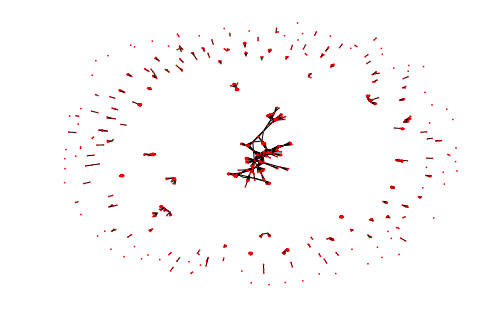

In [27]:
nx.draw(authors_graph,pos = nx.spring_layout(authors_graph),node_size=[0.5,0.5])

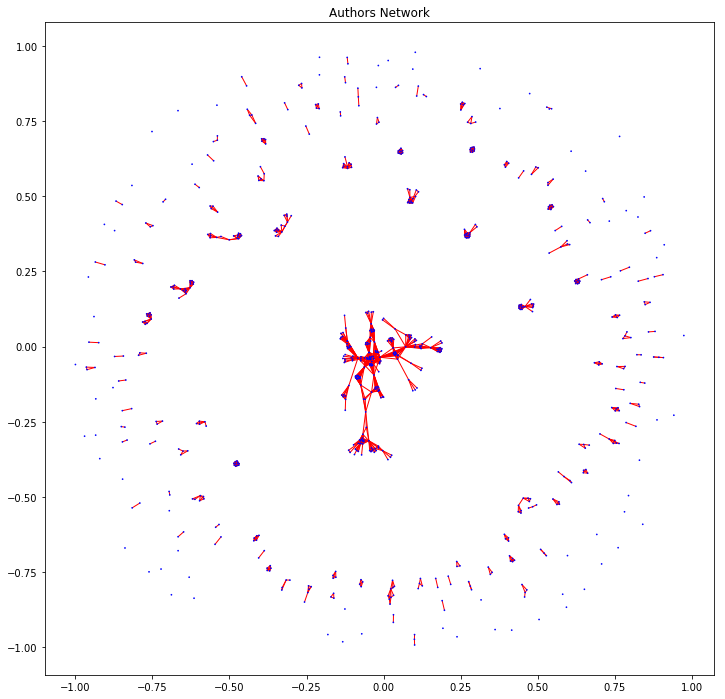

In [28]:
plt.figure(figsize=(12,12)) 
plt.title('Authors Network')
nx.draw_networkx(authors_graph,node_color='b',edge_color='r',node_size=[0.5,0.5],with_labels=False,pos= nx.spring_layout(authors_graph))
plt.show()


### Key words extraction

#### TF-IDF

In [29]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer


In [30]:
text = np.array(df_data['abstract'])

In [31]:
#ps = PorterStemmer()
#stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words())
l = ['the','and','of','is','with','it','this','to','but','not','in','for','some','as','no','was','just','would']
for word in l : 
    stop_words.add(word)

In [32]:
for i,abstract in enumerate(text): 
    try: 
        text[i] = re.sub(pattern='[^a-zA-Z]', repl=' ', string = abstract)
        text[i] = text[i].lower()
        text[i] = [word for word in text[i].split() if not word in stop_words]
        #text[i] = [stemmer.stem(t) for t in text[i]]
        #text[i] = [ps.stem(word) for word in text[i] if not word in set(stopwords.words('english'))]
        text[i] = ' '.join(text[i])
        
    except TypeError: 
        text[i] = ''

In [33]:
bow_transformer = CountVectorizer(ngram_range=(1,3)).fit(text)
len(bow_transformer.vocabulary_)

54815

In [34]:
bow_transformer.vocabulary_

{'research': 40126,
 'questions': 38446,
 'play': 35102,
 'critical': 10393,
 'role': 41200,
 'seldom': 42661,
 'examined': 16807,
 'systematically': 48253,
 'study': 46873,
 'kinds': 25806,
 'addressed': 1006,
 'cscl': 10508,
 'empirical': 15252,
 'relationship': 39591,
 'methods': 29941,
 'part': 33563,
 'using': 52574,
 'outcomes': 32976,
 'earlier': 14283,
 'analysis': 1847,
 'showed': 43516,
 'mainly': 28585,
 'focused': 18895,
 'design': 11722,
 'implementation': 22656,
 'technological': 49235,
 'curricular': 10741,
 'interventions': 25037,
 'influenced': 23598,
 'degree': 11354,
 'although': 1633,
 'relationships': 39617,
 'strict': 45509,
 'results': 40766,
 'confirmed': 8812,
 'well': 53797,
 'contradicted': 9609,
 'intuitive': 25191,
 'conceptions': 8304,
 'implications': 22727,
 'future': 19812,
 'discussed': 13542,
 'research questions': 40321,
 'questions play': 38486,
 'play critical': 35109,
 'critical role': 10418,
 'role research': 41285,
 'research role': 40333,
 'rol

In [35]:
matrix_ = bow_transformer.transform(text)
matrix_.shape

(410, 54815)

In [36]:
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(matrix_)

In [37]:
feature_names = bow_transformer.vocabulary_

In [38]:
#doc = 0
#feature_index = tfidf_matrix[doc,:].nonzero()[1]
#tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])

In [39]:
feature_names = {v: k for k, v in bow_transformer.vocabulary_.items()}


In [40]:
key_words = []
classment = []
for doc in range(len(text)):
    classment = []
    feature_index = tfidf_matrix[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        classment.append((w, s))
    classment.sort(key = lambda x : x[1],reverse=True)
    key_words.append(classment[:7])

In [41]:
key_words

[[('research questions', 0.3354469601717947),
  ('research', 0.24821789183335757),
  ('questions', 0.21530536395847108),
  ('research questions methods', 0.1433688162444777),
  ('relationship research questions', 0.1433688162444777),
  ('relationship research', 0.1433688162444777),
  ('questions methods', 0.1433688162444777)],
 [('game', 0.1510965845231164),
  ('design process', 0.12857766064226833),
  ('involves', 0.11953699531590653),
  ('games', 0.1110084094575533),
  ('collaboratively', 0.10073105634874427),
  ('designing', 0.0953175783459125),
  ('create', 0.09254969607857627)],
 [('reflective', 0.15026807222043048),
  ('subjects factor', 0.12829633432603532),
  ('assess utility', 0.12829633432603532),
  ('quality', 0.11560208006252001),
  ('utility', 0.10971159872862808),
  ('subjects', 0.10971159872862808),
  ('time', 0.10130275419000839)],
 [('body', 0.15009817932012273),
  ('resource', 0.13309175464395845),
  ('material', 0.12903380699571534),
  ('touchscreen', 0.1281512826459

#### Using Rake

In [43]:
import rake
import operator

In [44]:
rake_object = rake.Rake("ressources/SmartStoplist.txt")

In [45]:
rake_object.run(df_data['abstract'][0]).sort(key = lambda x : x[1],reverse= True)

In [46]:
keywords = []
for abstract in df_data['abstract']:
    try:
        classment = rake_object.run(abstract)
        classment.sort(key = lambda x : x[1]>3,reverse= True)
        keywords.append(classment[:15])
    except TypeError: 
        keywords.append('no_text')

In [47]:
keywords

[[('research questions influenced research methods', 15.733333333333333),
  ('research questions play', 8.6),
  ('cscl empirical research', 8.466666666666665),
  ('future cscl research', 8.466666666666665),
  ('research questions', 5.6),
  ('cscl research', 5.466666666666667),
  ('earlier analysis', 4.0),
  ('analysis showed', 4.0),
  ('curricular interventions', 4.0),
  ('results confirmed', 4.0),
  ('intuitive conceptions', 4.0),
  ('critical role', 3.5),
  ('examined systematically', 3.5),
  ('research', 2.8),
  ('methods', 2.3333333333333335)],
 [('media product based', 8.5),
  ('students collaboratively engaged', 7.75),
  ('students designing location', 7.25),
  ('collaboratively organised', 4.5),
  ('paper describes', 4.0),
  ('based games', 4.0),
  ('learn history', 4.0),
  ('learning scenario', 4.0),
  ('video footage', 4.0),
  ('analysis focuses', 4.0),
  ('design process', 4.0),
  ('involves translation', 4.0),
  ('source material', 4.0),
  ('students create', 3.75),
  ('game

### On the whole text

In [48]:
from tika import parser
for subdir, dirs, files in os.walk(rootdir):
    #print(files)
    for file in files:
        path = os.path.join(subdir, file)
        #print(path)
        if 'pdf' in path:
            #print(path)
            raw = parser.from_file(path)
            

In [49]:
#print(raw['content'])

In [50]:
import sys
import os

In [51]:
j = 0
TOTEXT = 'pdftotext -nopgbrk -eol mac'
rootdir = '/Users/nourghaliaabassi/Desktop/paper2'

for subdir, dirs, files in os.walk(rootdir):
    #print(files)
    for file in files:
       
        path = os.path.join(subdir, file)
        #print(path)
        if 'pdf' in path:
            j = j + 1 
            #print(path)
            os.system(TOTEXT + path)

In [52]:
contents = []
i = 0
source = []
errors = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if 'txt' in file:
            i += 1
            path = os.path.join(subdir, file)
            with open(path) as file:
                try:
                    text = file.read()
                    contents.append(text)
                    source.append(subdir[len(rootdir):])
                except:
                    name, message, content = sys.exc_info()
                    errors.append(message)


In [53]:
len(errors)

9

In [54]:
selection = contents[0][contents[0].find('Introduction'):contents[0].find('\n\nReferences\n')]

In [55]:
keywords_in_text = []
for text_ in contents:
    selection = text_[text_.find('Introduction'):text_.find('\n\nReferences\n')]
    if selection == '' and text_ != ' ':
        selection = text_[text_.find('Keywords'):text_.find('\n\nReferences\n')]
    try:
        classment = rake_object.run(selection)
        classment.sort(key = lambda x : x[1]>3,reverse= True)
        keywords_in_text.append(classment[:15])
    except TypeError: 
        keywords_in_text.append('PROBLEM')

In [56]:
keywords_in_text

[[('elaborate coding scheme called adam', 20.5),
  ('examines cscl research practice comprehensively', 19.614829297638742),
  ('chat tool decreases ‘chat confusion', 18.5),
  ('roughly equally frequent distribution', 16.0),
  ('productive multivocality project demonstrated', 15.0),
  ('newer analytic techniques found', 14.333333333333334),
  ('surveying 16 cscl community leaders', 13.729508196721312),
  ('facilitating productive knowledge building', 13.571428571428571),
  ('chose representative cscl journals', 12.479508196721312),
  ('automatically follow research question', 12.301987767584096),
  ('asynchronous discussion data mining', 12.194444444444445),
  ('content analysis addressing issues', 11.503225806451614),
  ('recent cscl empirical investigations', 11.479508196721312),
  ('learning process involved interaction', 11.01131221719457),
  ('selected 310 empirical cscl investigations', 10.87950819672131)],
 [('computer science learning computer skills', 17.011494252873565),
  ('w

### With TF_IDF

In [57]:
len(contents)

255

In [58]:
tmp_content = []
for text_ in contents:
    selection = text_[text_.find('Introduction'):text_.find('\n\nReferences\n')]
    if selection == '' and text_ != ' ':
        selection =text_[text_.find('Keywords'):text_.find('\n\nReferences\n')]
    if selection == '' and text_ != ' ':
        selection = text_[:text_.find('\n\nReferences\n')]
    if '...............................' in selection :
        selection = ''
    tmp_content.append(selection)

In [59]:
len(tmp_content)

255

In [60]:
for i,text_ in enumerate(tmp_content): 
    #try: 
        tmp_content[i] = re.sub(pattern='[^a-zA-Z]', repl=' ', string = text_)
        tmp_content[i] = tmp_content[i].lower()
        tmp_content[i] = [word for word in tmp_content[i].split() if not word in stop_words]
        #text[i] = [ps.stem(word) for word in text[i] if not word in set(stopwords.words('english'))]
        tmp_content[i] = ' '.join(tmp_content[i])
    #except TypeError: 
        #tmp_content[i] = ''

In [61]:
bow_transformer_big = CountVectorizer(ngram_range=(1,3),max_df=0.8, max_features=2500).fit(tmp_content)

In [62]:
len(bow_transformer_big.vocabulary_)

2500

In [63]:
matrix_big = bow_transformer_big.transform(np.array(tmp_content)[np.array(tmp_content)!=''])
matrix_big.shape

(247, 2500)

In [64]:
tfidf_transformer_2 = TfidfTransformer()
tfidf_matrix_2 = tfidf_transformer_2.fit_transform(matrix_big)

In [65]:
feature_names_big = {v: k for k, v in bow_transformer_big.vocabulary_.items()}


In [66]:
key_words_large = []
classment_large = []
for doc in range(len(np.array(tmp_content)[np.array(tmp_content)!=''])):
    classment_large = []
    feature_index_big = tfidf_matrix_2[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index_big, [tfidf_matrix_2[doc, x] for x in feature_index_big])
    for w, s in [(feature_names_big[i], s) for (i, s) in tfidf_scores]:
        classment_large.append((w, s))
    classment_large.sort(key = lambda x : x[1],reverse=True)
    key_words_large.append(classment_large[:7])

In [67]:
key_words_large

[[('questions', 0.4887506395042763),
  ('research questions', 0.4365226850682245),
  ('cscl', 0.3254159599891646),
  ('cscl research', 0.21831728353801355),
  ('methods', 0.21346613543810322),
  ('outcomes', 0.13519897378640006),
  ('interventions', 0.12051791683975047)],
 [('game', 0.7190610747228194),
  ('location', 0.33236668281635234),
  ('games', 0.272548953682409),
  ('game design', 0.16953927376041558),
  ('scenario', 0.15542609040916042),
  ('locations', 0.1359762148336966),
  ('product', 0.09942335646141817)],
 [('teams', 0.39718524939757577),
  ('quality', 0.28584759662844117),
  ('collaborative', 0.25135818832371115),
  ('condition', 0.24680216767287394),
  ('team', 0.2010633261557019),
  ('claims', 0.15875647004969376),
  ('member', 0.1584056555594028)],
 [('bodily', 0.417631421943223),
  ('children', 0.3505714286421289),
  ('material', 0.23029130593485228),
  ('frame', 0.20485078696705797),
  ('resources', 0.198857968057118),
  ('line', 0.18494661673556684),
  ('collaborat

## Doc clustering

In [68]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from collections import Counter


In [69]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
%time km.fit(tfidf_matrix_2)
clusters = km.labels_.tolist()

CPU times: user 4.34 s, sys: 10.3 ms, total: 4.35 s
Wall time: 4.35 s


In [70]:
Counter(clusters)

Counter({0: 32, 1: 26, 2: 33, 3: 46, 4: 47, 5: 18, 6: 45})

In [71]:
titles = [content[:content.find('\n')] if '...............................' not in content else '' for content in contents]

In [72]:
len(np.array(tmp_content)[np.array(tmp_content)!=''])

247

In [73]:
tmp = {'titles': np.array(titles)[np.array(titles)!=''], 'texts' : np.array(tmp_content)[np.array(tmp_content)!=''], 'clusters': clusters}
df_clusters = pd.DataFrame.from_dict(tmp)

In [74]:
df_clusters.head()

titles  \
0  Research Questions and Research Methods in CSC...   
1  Students’ Design Decisions in Collaborative De...   
2  Activity Design Models to Support the Developm...   
3  “This Is the Size of One Meter”: Children’s Bo...   
4  Assessment and Collaborative Inquiry: A Review...   

                                               texts  clusters  
0  introduction progress field often judged based...         3  
1  introduction paper addresses upper secondary s...         5  
2  introduction collaborative learning provide ma...         6  
3  introduction already vygotsky argued gestures ...         4  
4  introduction last decades collaborative inquir...         3

In [75]:
df_clusters[df_clusters['titles']=='']

Empty DataFrame
Columns: [titles, texts, clusters]
Index: []

In [76]:
km.cluster_centers_.argsort()[:, ::-1]

array([[1234,  251,  623, ..., 2334, 2433,  986],
       [2268, 2266,  405, ...,  464, 1839, 1787],
       [2498, 2161,  391, ..., 1877,  483, 2499],
       ...,
       [ 432, 2262,  985, ..., 1042, 1052, 1300],
       [ 935,  937, 1665, ..., 1042, 1052,    0],
       [ 985,  129,  360, ..., 1246, 1069, 2288]])

### Visualization of clusters : 

In [77]:
import warnings
warnings.filterwarnings("ignore")

In [78]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5:'#000000',6 : '#0000FF' }


In [79]:
import os  # for os.path.basename
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS

def plot_cos_dist_clust(X,clusters):
    MDS()
    dist = 1 - cosine_similarity(X)

    # convert two components as we're plotting points in a two-dimensional plane
    # "precomputed" because we provide a distance matrix
    # we will also specify `random_state` so the plot is reproducible.
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

    pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

    xs, ys = pos[:, 0], pos[:, 1]
    %matplotlib inline 

    #create data frame that has the result of the MDS plus the cluster numbers and titles
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=np.array(titles)[np.array(titles)!=''])) 

    #group by cluster
    groups = df.groupby('label')


    # set up plot
    fig, ax = plt.subplots(figsize=(60, 40)) # set size
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    #iterate through groups to layer the plot
    #note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                 color=cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         # changes apply to the y-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelleft='off')

    ax.legend(numpoints=1)  #show legend with only 1 point

    #add label in x,y position with the label as the film title
    for i in range(len(df)):
        ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  


    plt.savefig('clusters_small.png')
    plt.show() #show the plot
    
    return 
    

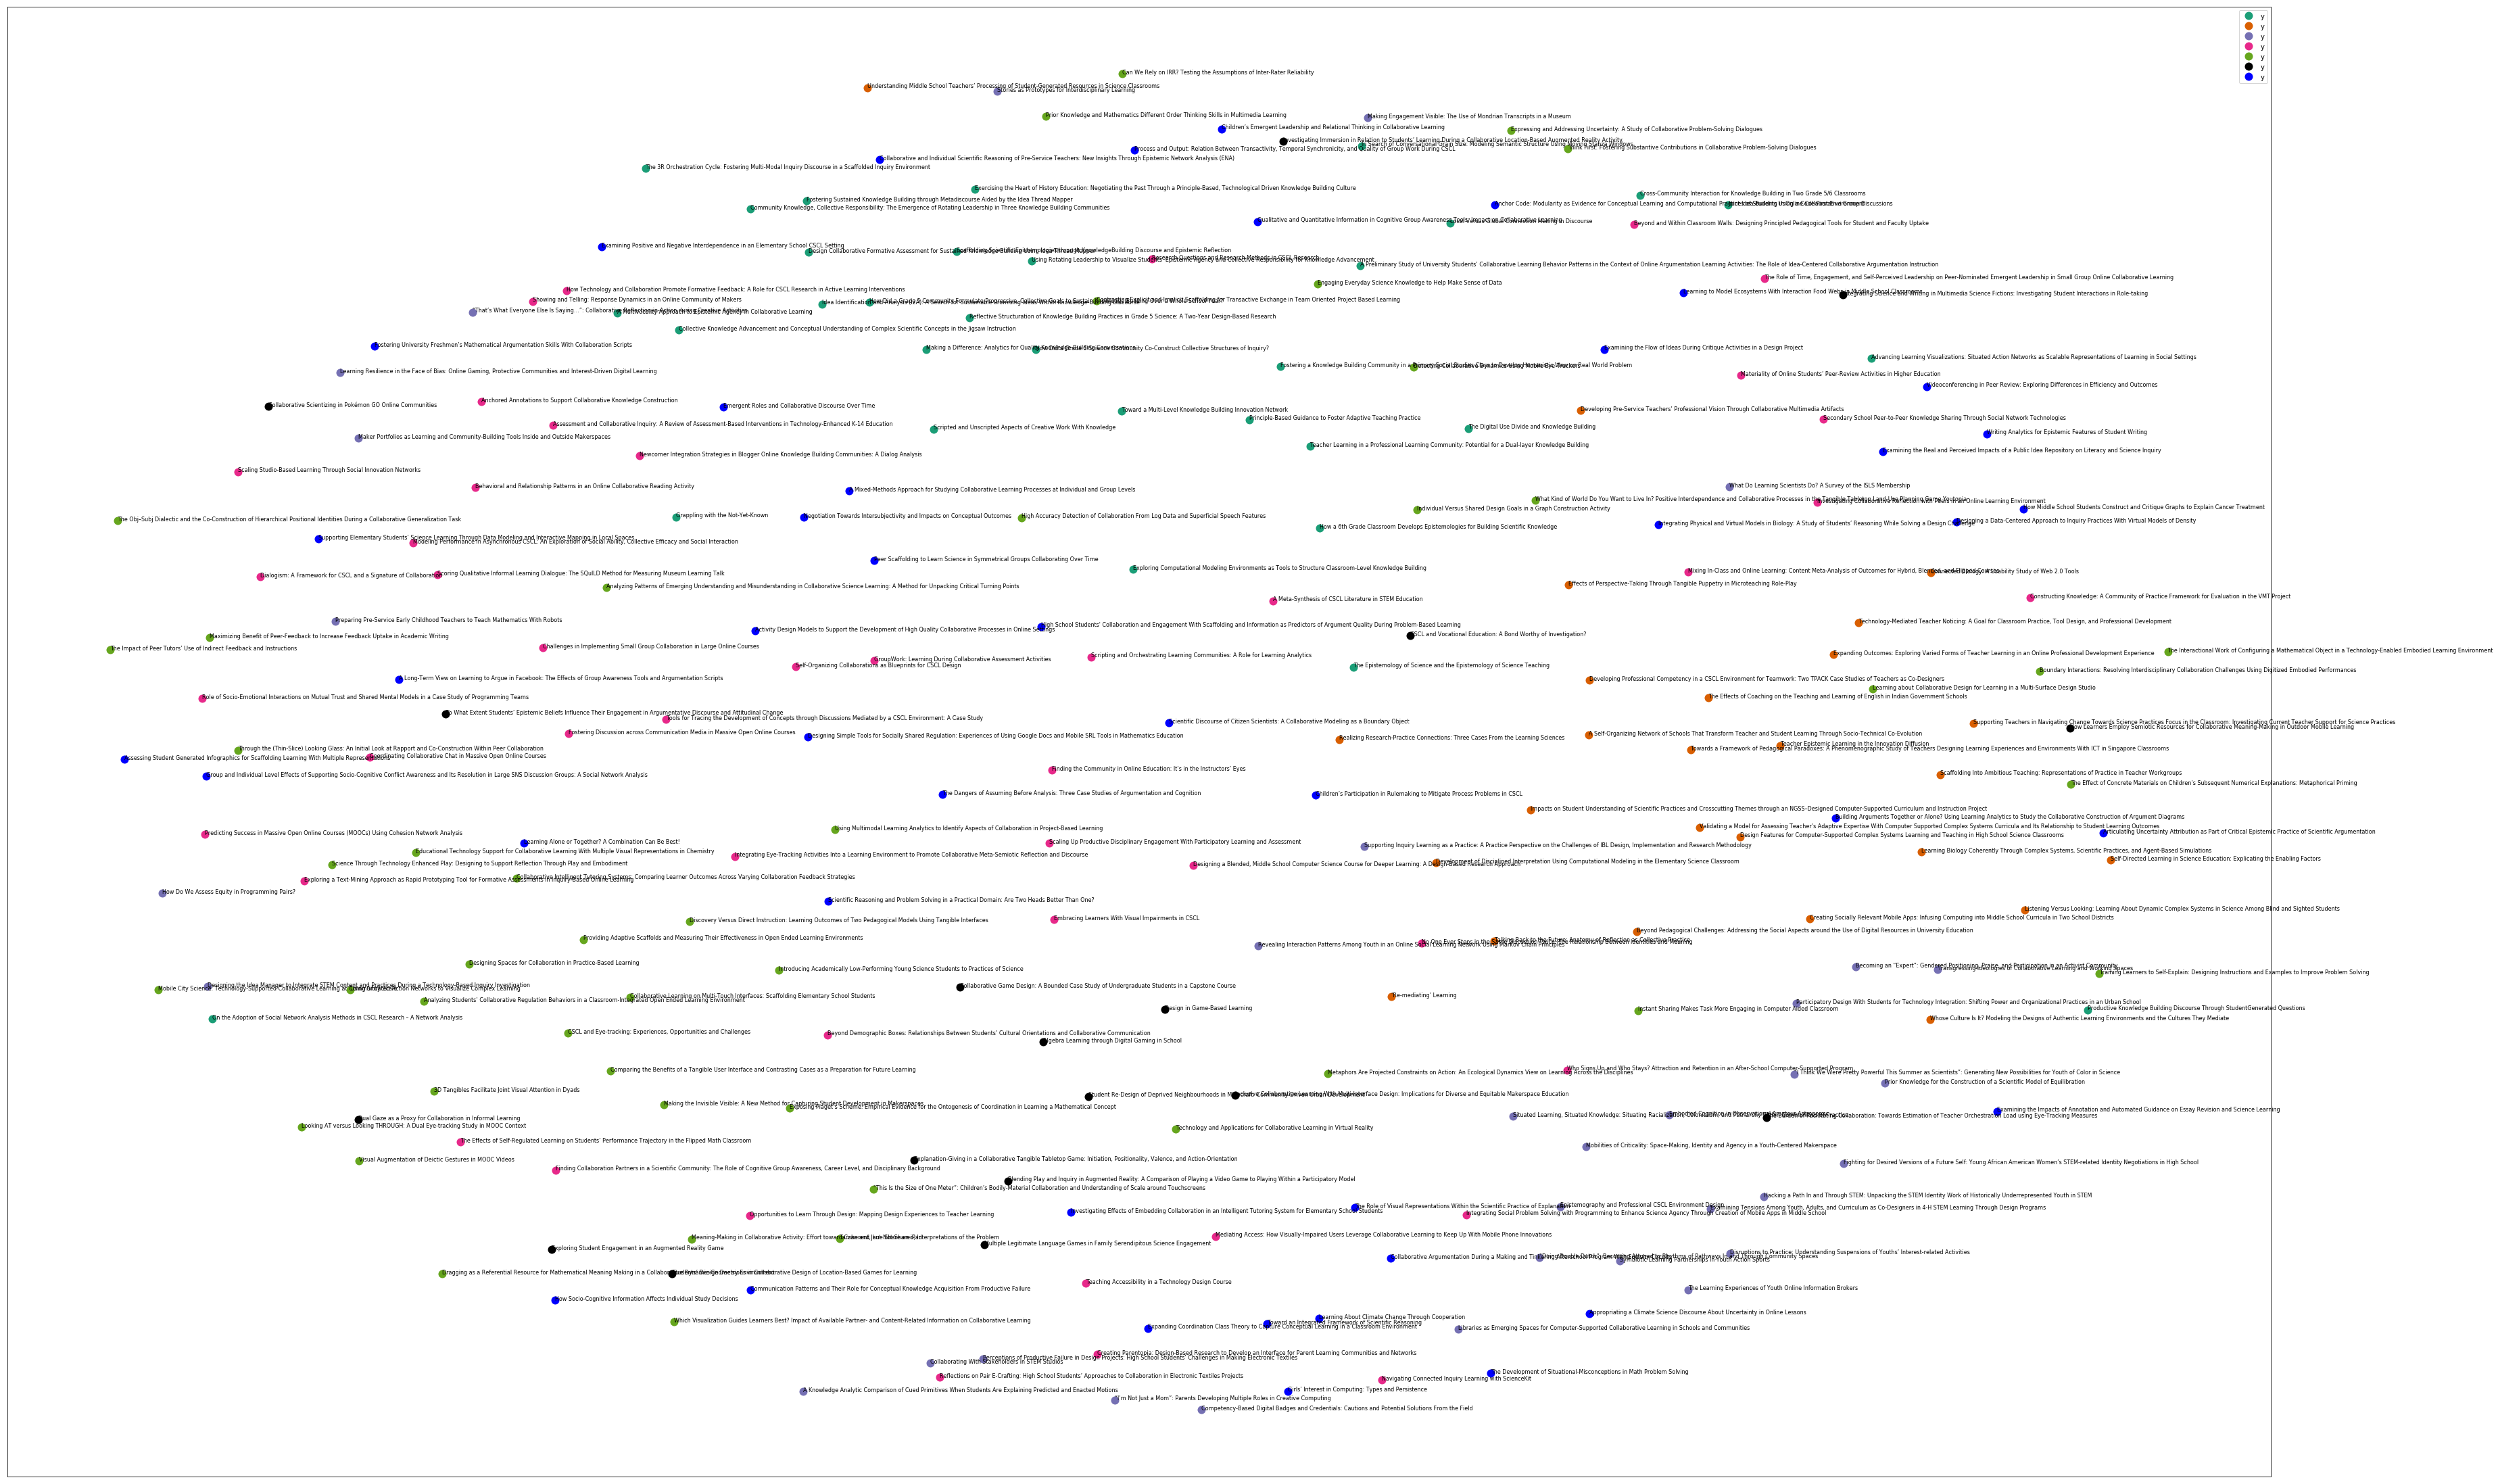

In [80]:
plot_cos_dist_clust(tfidf_matrix_2,clusters)

In [91]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


def see_clusters(X,clusters,range_n_clusters):
    silhouette = []
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        silhouette.append(silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:,0], X[:,1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    return silhouette, range_n_clusters

For n_clusters = 2 The average silhouette_score is : 0.008339128488726194
For n_clusters = 5 The average silhouette_score is : 0.01103850761697328
For n_clusters = 7 The average silhouette_score is : 0.014519473340077952
For n_clusters = 10 The average silhouette_score is : 0.01293603454561437
For n_clusters = 20 The average silhouette_score is : 0.025180313566467518
For n_clusters = 30 The average silhouette_score is : 0.02730995845703453
For n_clusters = 50 The average silhouette_score is : 0.03765541841524754
For n_clusters = 70 The average silhouette_score is : 0.05697616560109299
For n_clusters = 100 The average silhouette_score is : 0.06397991186800818


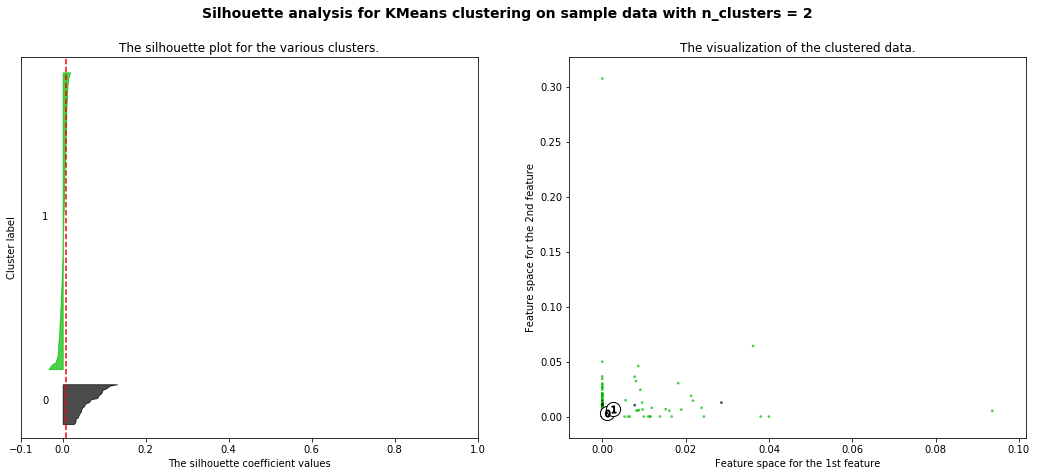

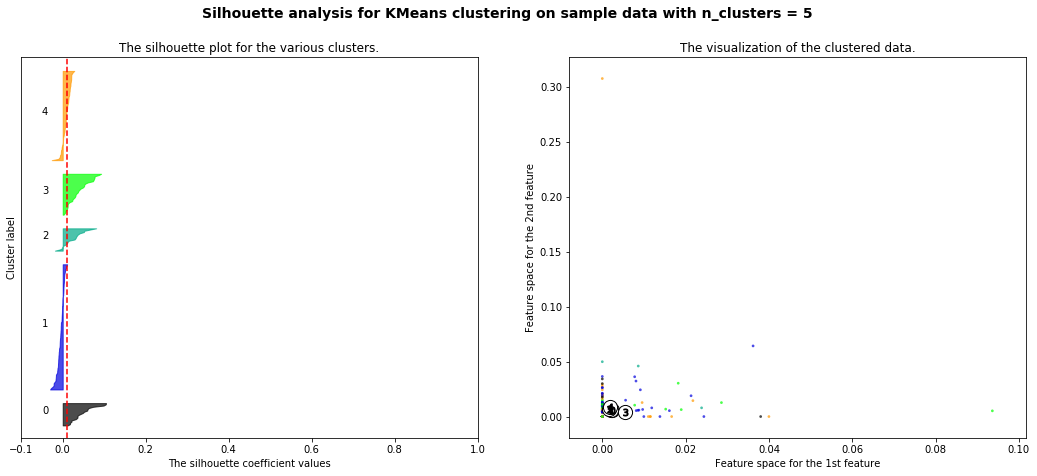

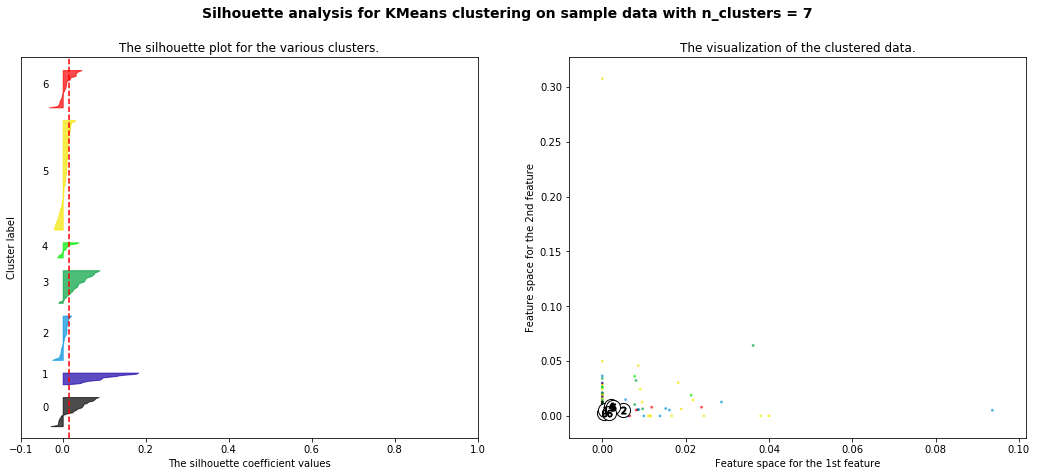

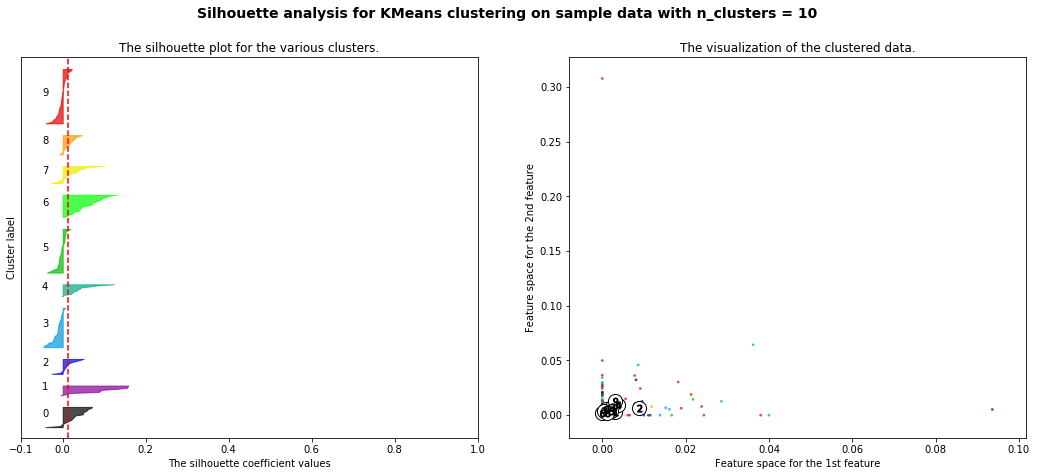

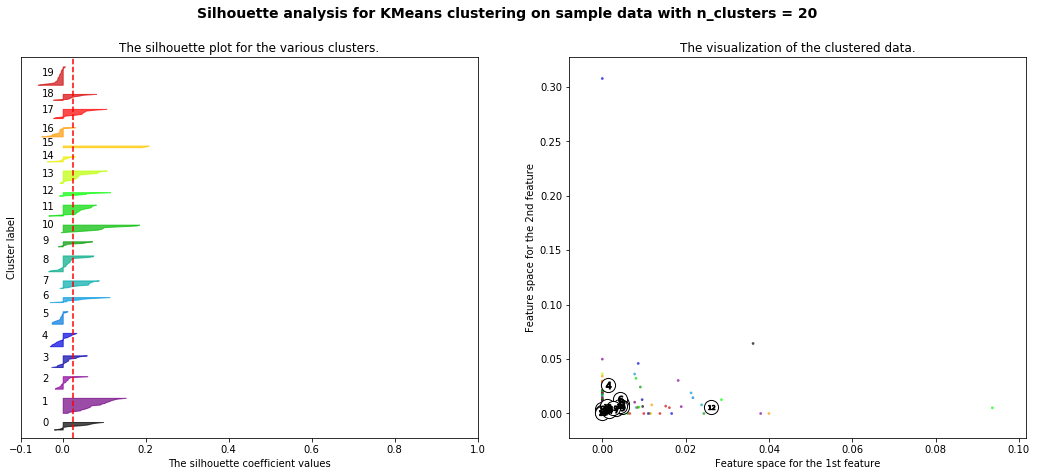

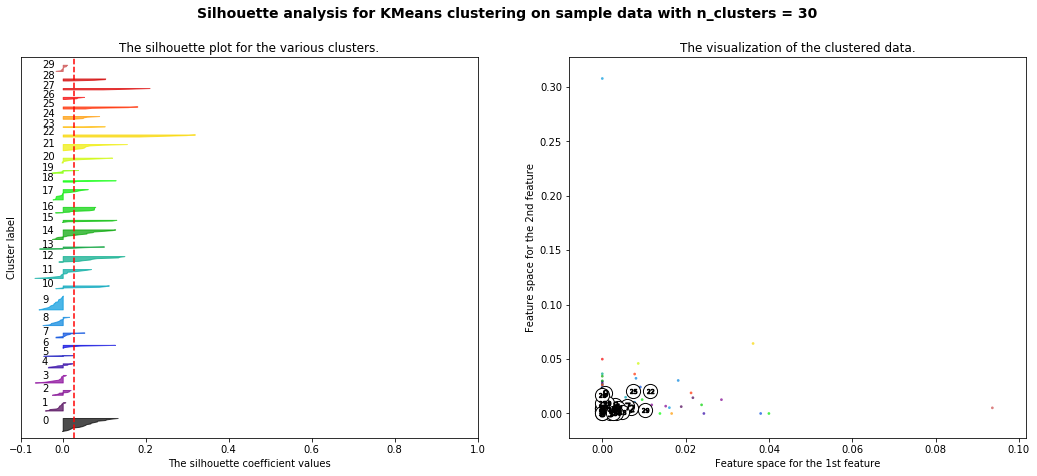

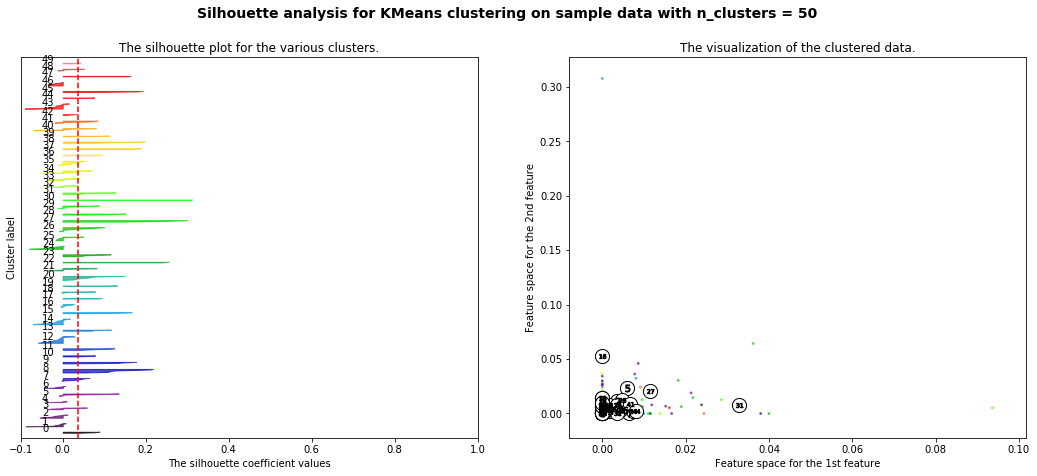

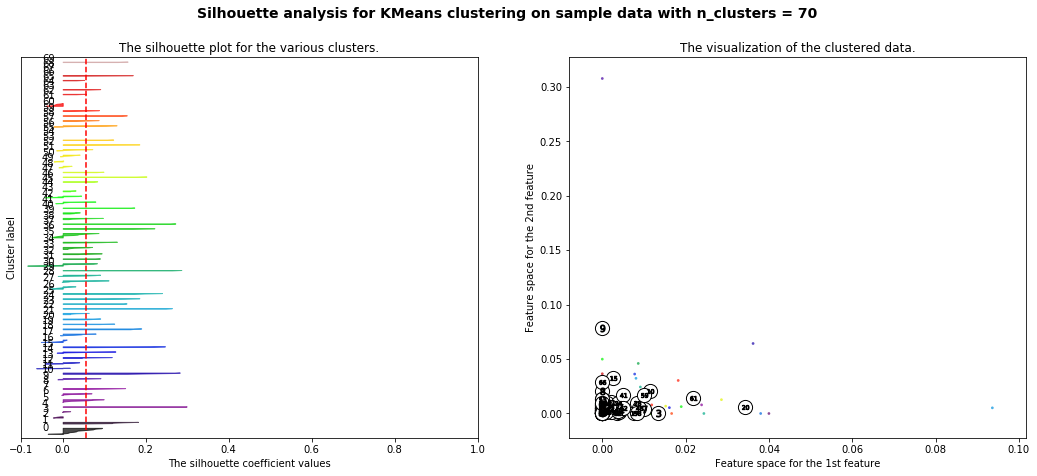

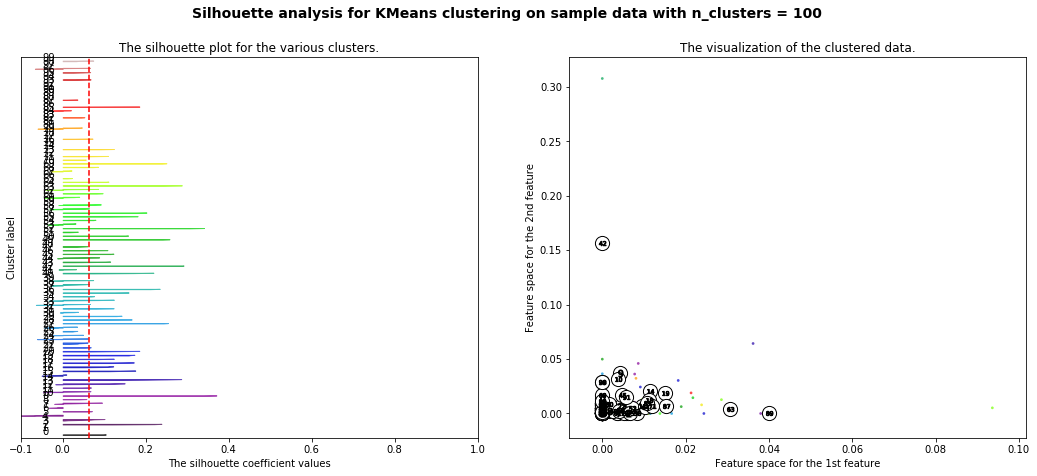

In [92]:
silhouette, range_n_clusters = see_clusters(tfidf_matrix_2.toarray(),clusters,range_n_clusters = [2,5,7,10,20,30,50,70,100])

In [97]:
len(silhouette) == len(range_n_clusters)

True

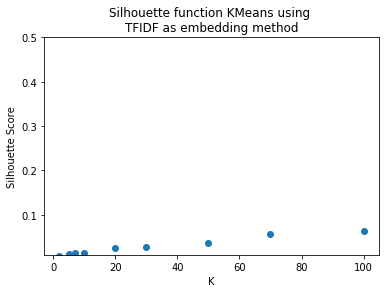

In [99]:
# Plotting the silhouette function to assess the best K to use
plt.scatter(range_n_clusters, silhouette)
plt.ylim(ymin= 0.01 ,ymax = 0.5)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette function KMeans using \nTFIDF as embedding method')
plt.savefig('sil_km_tfidf')

In [100]:
tfidf_matrix_2.shape

(247, 2500)

### v_measure 

In [101]:
#from sklearn.metrics.cluster import v_measure_score
#v_measure_score(tfidf_matrix_2, cluster_labels)

#### Find distinct keywords in each cluster

In [102]:
words_each_cluster = km.cluster_centers_.argsort()[:, ::-1]

In [103]:
distinct = []
for cluster in words_each_cluster:
    bool_ = False
    tmp = set(cluster[:50])
    not_modified = set(cluster[:50])
    for other in words_each_cluster:
        tmp2 = set(other[:50])
        bool_ = (not_modified != tmp2)
        if bool_:
            tmp = tmp - set(other[:50])
    distinct.append(tmp)

In [104]:
distinct

[{51,
  137,
  217,
  251,
  321,
  371,
  717,
  900,
  1051,
  1052,
  1126,
  1129,
  1202,
  1220,
  1225,
  1233,
  1234,
  1237,
  1238,
  1303,
  1485,
  1500,
  1502,
  1545,
  1788,
  1959,
  2072,
  2091,
  2307,
  2317,
  2318,
  2447,
  2499},
 {224,
  284,
  295,
  404,
  405,
  528,
  591,
  678,
  801,
  809,
  1073,
  1203,
  1294,
  1433,
  1494,
  1505,
  1614,
  1701,
  1747,
  1748,
  1968,
  1994,
  2041,
  2084,
  2246,
  2270,
  2313,
  2425},
 {19,
  189,
  389,
  559,
  682,
  732,
  849,
  850,
  938,
  1047,
  1048,
  1049,
  1061,
  1301,
  1304,
  1394,
  1461,
  1462,
  1586,
  1610,
  1621,
  1654,
  1656,
  1678,
  1693,
  1758,
  1787,
  2121,
  2122,
  2161,
  2450,
  2471,
  2498},
 {7,
  23,
  148,
  308,
  383,
  466,
  501,
  502,
  620,
  1139,
  1140,
  1441,
  1617,
  1620,
  1630,
  1689,
  1852,
  2045,
  2296,
  2401,
  2453},
 {22,
  433,
  482,
  683,
  704,
  805,
  833,
  834,
  864,
  1019,
  1275,
  1339,
  1510,
  1801,
  1919,
  1930,

In [105]:
feature_names_big

{1754: 'progress',
 861: 'field',
 1534: 'often',
 2407: 'validity',
 715: 'empirical',
 872: 'findings',
 948: 'generated',
 1228: 'kinds',
 1572: 'outcomes',
 870: 'find',
 1788: 'question',
 138: 'ask',
 1791: 'questions',
 614: 'direct',
 167: 'attention',
 1599: 'particular',
 144: 'aspects',
 1644: 'phenomena',
 1114: 'influence',
 1417: 'methods',
 315: 'choose',
 105: 'answer',
 587: 'determined',
 181: 'available',
 2396: 'us',
 1684: 'possible',
 2470: 'without',
 1416: 'methodology',
 582: 'despite',
 1078: 'importance',
 1871: 'relatively',
 1318: 'little',
 785: 'examined',
 1827: 'recent',
 1188: 'investigations',
 517: 'cscl',
 1863: 'related',
 242: 'bridge',
 441: 'connect',
 1241: 'known',
 1562: 'organize',
 26: 'activities',
 586: 'determine',
 370: 'collection',
 766: 'evaluate',
 1872: 'relevance',
 1919: 'results',
 139: 'asked',
 2382: 'understand',
 1734: 'problems',
 964: 'goals',
 1206: 'johnson',
 9: 'according',
 1732: 'problem',
 1195: 'issue',
 245: 'broa

In [106]:
from __future__ import print_function

order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

print("Top distinct terms per cluster: \n" )    
for i,set_ in enumerate(distinct): #replace 6 with n words per cluster
    print("Cluster %d words:" % i, end='')
    
    for elem in set_:
        print(' %s' % feature_names_big[elem],end = ',')
    print('\n') 
    
    print("Cluster %d titles:" % i, end='\n' )
    for title in df_clusters['titles'][df_clusters['clusters']== i]:
        print(' ** %s,' % title)
        #print()
    print() #add whitespace
    print() #add whitespace
    

Top distinct terms per cluster: 

Cluster 0 words: theory, forum, online discourse, artifacts, thread, threads, water, light, singapore, idea, idea building, scardamalia, sna, itm, advancement, ck, zhang, kb, kf, network, ena, knowledge advancement, knowledge building, knowledge creation, knowledge forum, bereiter, note, notes, innovation, inquiry, collective, building, question,

Cluster 0 titles:
 ** Scaffolding Scientific Epistemologies through KnowledgeBuilding Discourse and Epistemic Reflection,
 ** How Did a Grade 5 Community Formulate Progressive, Collective Goals to Sustain Knowledge Building Over a Whole School Year?,
 ** Principle-Based Guidance to Foster Adaptive Teaching Practice,
 ** Grappling with the Not-Yet-Known,
 ** A Multivocality Approach to Epistemic Agency in Collaborative Learning,
 ** The 3R Orchestration Cycle: Fostering Multi-Modal Inquiry Discourse in a Scaffolded Inquiry Environment,
 ** Fostering Sustained Knowledge Building through Metadiscourse Aided by t

##### Create csv for gephi 

In [110]:
df_authors = pd.DataFrame(data = authors_nodes, columns = ['Label'])

In [111]:
df_authors['Id'] = [i for i in range(len(df_authors))]

In [112]:
df_authors.head()

Label  Id
0  Quignard, Matthieu   0
1    Messina, Richard   1
2       Telhan, Orkan   2
3   Sannino, Annalisa   3
4     Nacu, Denise C.   4

In [113]:
df_edges = pd.DataFrame(data= authors_edges, columns=['Source_name','Target_name'])

In [114]:
dict_ = df_authors.set_index('Id').to_dict(orient= 'dict')
inv_map = {v: k for k, v in dict_['Label'].items()}

In [119]:
df_authors.to_csv('ressources/authors.csv')
df_edges.to_csv('ressources/authors_edges.csv')

In [126]:
df_edges.head()

Source  Target
0     562     612
1     342     443
2     298     186
3     392     527
4     282     109

In [127]:
#df_edges['Source'] = [inv_map[elem] for elem in df_edges['Source']]
#df_edges['Target'] = [inv_map[elem] for elem in df_edges['Target_name']]

In [128]:
#df_edges = df_edges[['Source','Target']]

In [129]:
#df_edges.to_csv('authors_edges.csv')

### Try to analyze the network : 

In [130]:
nx.connected_component_subgraphs(authors_graph)

<generator object connected_component_subgraphs at 0x1a23be9d58>

In [131]:
gen = nx.connected_component_subgraphs(authors_graph)

In [132]:
page_rank = sorted(nx.pagerank(authors_graph).items(), key=lambda kv: kv[1], reverse= True)

In [133]:
page_rank

[('Dillenbourg, Pierre', 0.0053556133477038175),
 ('Slotta, James D.', 0.005341775410528218),
 ('Rummel, Nikol', 0.004463762700596427),
 ('Fischer, Frank', 0.004204662628686648),
 ('Moher, Tom', 0.003474098999067806),
 ('Scardamalia, Marlene', 0.0032161395110214463),
 ('Puntambekar, Sadhana', 0.003128599670869885),
 ('Rosé, Carolyn P.', 0.003011143309218796),
 ('Ben-Zvi, Dani', 0.002970371160354607),
 ('Acosta, Alisa', 0.002905715726792946),
 ('Berland, Matthew', 0.0027617548470382303),
 ('Oshima, Ritsuko', 0.0027094021737880973),
 ('Kapur, Manu', 0.0026783859482956114),
 ('Hoppe, H. Ulrich', 0.002674092510953483),
 ('Hecking, Tobias', 0.002674092510953483),
 ('Kafai, Yasmin B.', 0.0026195867912009946),
 ('Rosé, Carolyn Penstein', 0.0026041116919770626),
 ('Dascalu, Mihai', 0.002600312563921622),
 ('Hilppö, Jaakko', 0.002556719867087719),
 ('Martinez-Maldonado, Roberto', 0.0025540187063959625),
 ('Shaffer, David Williamson', 0.002480922148628872),
 ('Järvelä, Sanna', 0.0024689438295

In [134]:
def graph_author(author): 
    selected_ = []
    for i,elem in enumerate(df_data['author']):
        #print(elem)
        if author in elem: 
            selected_.append(i)
    df_data.iloc[selected_,:].groupby(['year'])['year'].count().plot(kind='bar')
    plt.title('number of publications per year intervals for ' + author)
    plt.xlabel('years')
    plt.ylabel('publications_count')
    plt.tight_layout()
    return 

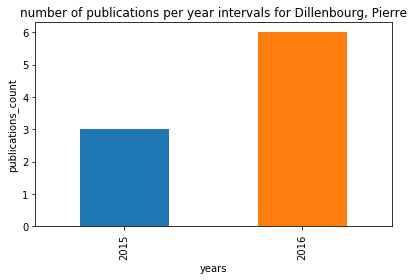

In [135]:
graph_author('Dillenbourg, Pierre')

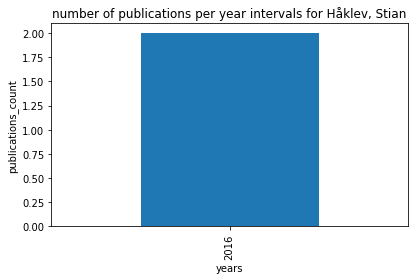

In [136]:
graph_author('Håklev, Stian')

In [137]:
nx.average_degree_connectivity(authors_graph)

{0: 0,
 1: 3.274074074074074,
 2: 3.403669724770642,
 3: 4.642361111111111,
 4: 5.762658227848101,
 5: 9.916666666666666,
 6: 7.716216216216216,
 7: 9.319327731092438,
 8: 8.42732558139535,
 9: 11.917874396135266,
 10: 10.566666666666666,
 11: 10.545454545454545,
 12: 16.431818181818183,
 13: 15.423076923076923,
 14: 14.979591836734693,
 15: 9.266666666666667,
 16: 16.827205882352942,
 17: 11.882352941176471,
 18: 22.061728395061728,
 19: 17.907894736842106,
 20: 15.15,
 21: 19.11904761904762,
 22: 17.84090909090909,
 24: 19.666666666666668,
 25: 18.88,
 26: 9.846153846153847,
 28: 12.142857142857142,
 29: 18.344827586206897,
 31: 10.096774193548388,
 33: 18.151515151515152,
 34: 19.705882352941178,
 51: 16.50980392156863}

In [138]:
nx.degree(authors_graph)

DegreeView({'Quignard, Matthieu': 1, 'Messina, Richard': 12, 'Telhan, Orkan': 10, 'Sannino, Annalisa': 8, 'Nacu, Denise C.': 8, 'Lin, Chiu Pin': 3, 'Johnson, Raymond': 11, 'Lesama, Manoel Flores': 8, 'Tscholl, Michael': 2, 'Harrer, Benedikt W.': 1, 'Reichersdorfer, Elisabeth': 4, 'Gnesdilow, Dana': 1, 'Lu, Lin': 4, 'Bang, Megan': 11, 'Lefstein, Adam': 1, 'Reeve, Richard': 0, 'Viswanathan, Anandhi': 1, 'Anderson, Emma': 9, 'Squire, Kurt': 8, 'Reimann, Peter': 14, 'Matsuzawa, Yoshiaki': 3, 'Lee, Victor R.': 6, 'Allert, Heidrun': 2, 'Severance, Samuel': 11, 'Breuleux, Alain': 0, 'Rosson, Mary Beth': 0, 'Zhao, Naxin': 1, 'Peppler, Kylie': 19, 'Vitale, Jonathan M.': 2, 'Chang, Stephanie': 10, 'Jona, Kemi': 10, 'Cober, Rebecca': 19, 'Suzuki, Hideyuki': 6, 'Stevens, Reed': 1, 'Hoppe, H. Ulrich': 15, 'DeSchryver, Michael': 1, 'Bresser, Nicolas': 3, 'Kawasaki, Jarod': 2, 'Kim, Nam Ju': 2, 'Laina, Vasiliki': 3, 'Gaydos, Matthew': 7, 'Gergle, Darren': 2, 'Odemwingie, O. Carlette': 1, 'Graville-Sm

### Clustering using Glove

In [139]:
#path = '/Users/nourghaliaabassi/Downloads/glove.6B/glove.6B.100d.txt'

In [140]:
# Method for loading a text file in a DataFrame (each row corresponds to a line)
def load_data(path):
    with open(path) as file:
        words_file = pd.DataFrame([line.rstrip() for line in file])
    return words_file

In [141]:
# Method to load glove vectors from glove.6B, which is a file from stanford containing pre-trained glove vectors on
# wikipedia, which is more appropriate in our case than twitter glove vectors even if it contains less than for twitter.
def load_glove(path,n =100,):
    """Loading glove vectors
    n is the dimension of the vectors, can be 50, 100, 200 or 300"""
    glove_vectors_100 = load_data(path)
    glove_vectors_100[0] = glove_vectors_100[0].apply(lambda x : x.split(' ',1))
    words = pd.DataFrame(glove_vectors_100[0].apply(lambda x : x[0]))
    words['Vectors']= glove_vectors_100[0].apply(lambda x : x[1])
    del(glove_vectors_100)
    words.rename(columns={0:'Words'},inplace=True)
    words['Words'] = words.apply(lambda x : [elem.replace('<','').replace('>','') for elem in x ])
    words.set_index('Words',inplace=True)
    return words

In [142]:
#glove_df = load_glove(path)

In [143]:
import zipfile

In [144]:
zf = zipfile.ZipFile('ressources/glove100.csv.zip','r')

In [145]:
csv = zf.extract('glove100.csv')

In [146]:
glove_df = pd.read_csv(csv)

In [147]:
glove_df.head()

Words                                            Vectors
0   the  -0.038194 -0.24487 0.72812 -0.39961 0.083172 0...
1     ,  -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10...
2     .  -0.33979 0.20941 0.46348 -0.64792 -0.38377 0.0...
3    of  -0.1529 -0.24279 0.89837 0.16996 0.53516 0.487...
4    to  -0.1897 0.050024 0.19084 -0.049184 -0.089737 0...

In [148]:
#glove_df.to_csv('glove100.csv')

In [149]:
glove_df['Vectors'] = glove_df['Vectors'].apply(lambda x : x.split())

In [150]:
dict_of_words_vect = glove_df.set_index('Words').to_dict()['Vectors']

In [151]:
tfidf_matrix_2.toarray()[0]

array([0.01147413, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

In [152]:
feature_index = tfidf_matrix_2[doc,:].nonzero()[1]

In [153]:
max_len = max([len(s) for s in feature_names_big.values()])

In [154]:
def get_all_index_for_documents(tfidf_matrix_2):
    new_matrix = np.chararray(tfidf_matrix_2.shape, itemsize = max_len)
    for doc in range(new_matrix.shape[0]):
        feature_index = tfidf_matrix_2[doc,:].nonzero()[1]
        for index in feature_index:
            new_matrix[doc,index] =  feature_names_big[index]

    return new_matrix

In [155]:
new_matrix = get_all_index_for_documents(tfidf_matrix_2)

In [156]:
new_matrix

chararray([[b'abilities', '', '', ..., '', '', ''],
           ['', '', b'able', ..., '', '', ''],
           ['', b'ability', b'able', ..., '', '', ''],
           ...,
           ['', b'ability', b'able', ..., '', '', b'zhang'],
           ['', '', '', ..., '', '', ''],
           ['', '', b'able', ..., '', '', '']], dtype='|S32')

In [157]:
len(new_matrix[0])

2500

In [158]:
def assign_vectors(matrix, dict_of_words_vect):
    new_matrix = []
    for elem in matrix:
        representations = []
        for word in elem: 
            sum_ = np.zeros((100,))
            try : 
                if type(word) != type(''):
                    word = word.decode('utf-8')
                representations.append(np.array(list(map(lambda x : float(x),dict_of_words_vect[word]))))
            except KeyError:
                new_sentence = word.split()
                if len(new_sentence) > 1: 
                    for subword in new_sentence: 
                        try : 
                            sum_ += np.array(list(map(lambda x : float(x),dict_of_words_vect[subword])))
                        except KeyError : 
                            print(subword)
                    representations.append(sum_)
                    sum_ = np.zeros((100,))
        new_matrix.append(representations)
    return new_matrix

In [159]:
vectors_doc = assign_vectors(new_matrix,dict_of_words_vect)

isls
hmelo
isls
isls
isls
isls
isls
isls
isls
isls
isls
isls
isls
posttest
isls
isls
scardamalia
bereiter
isls
isls
isls
isls
isls
posttest
isls
isls
posttest
isls
isls
isls
scardamalia
bereiter
isls
isls
scardamalia
bereiter
isls
posttest
isls
isls
isls
isls
hmelo
isls
isls
scardamalia
bereiter
isls
isls
isls
isls
isls
isls
hmelo
isls
isls
isls
isls
isls
isls
isls
isls
isls
isls
isls
isls
isls
hmelo
isls
isls
isls
isls
posttest
isls
isls
hmelo
isls
isls
scardamalia
bereiter
isls
isls
isls
isls
isls
isls
scardamalia
bereiter
isls
isls
isls
scardamalia
bereiter
isls
isls
isls
isls
isls
isls
isls
isls
isls
isls
isls
hmelo
isls
isls
hmelo
isls
isls
isls
isls
isls
isls
isls
isls
isls
posttest
isls
hmelo
scardamalia
bereiter
isls
isls
isls
isls
isls
isls
isls
isls
icls
isls
isls
isls
isls
isls
isls
isls
isls
isls
isls
isls
hmelo
isls
isls
scardamalia
bereiter
isls
isls
isls
isls
isls
isls
scardamalia
bereiter
isls
isls
scardamalia
bereiter
isls
hmelo
isls
isls
isls
posttest
isls
isls
isls
h

In [160]:
average_vector = np.array(list(map(lambda x : np.mean(x,axis = 0),vectors_doc)))


In [161]:
average_vector[0]

array([-0.11043003,  0.26370901,  0.04822889,  0.22661834,  0.06979618,
       -0.06322649, -0.09164004, -0.0296165 , -0.08683625,  0.14248784,
       -0.00617441, -0.20608676,  0.23862699, -0.07403185,  0.1163622 ,
       -0.03868184,  0.06515073,  0.16087955, -0.24228163,  0.13373445,
       -0.1391499 , -0.22041947,  0.13607541, -0.06910846, -0.1569521 ,
       -0.28755594,  0.12536945, -0.23301271, -0.2121334 ,  0.06368971,
       -0.12867844,  0.40548854, -0.28743009, -0.08836159,  0.14587824,
        0.0398171 ,  0.00192643,  0.09632269, -0.18421024, -0.1035433 ,
       -0.38171517, -0.20036233, -0.08566191, -0.09705671, -0.24280128,
       -0.08520387,  0.14737908, -0.09692931, -0.18261742, -0.49133464,
        0.27934058, -0.02832432,  0.03198312,  0.79056727,  0.07653754,
       -1.67540853,  0.15338474, -0.29510459,  1.37858218,  0.29901235,
       -0.1773073 ,  0.50614262, -0.06761998, -0.07379473,  0.72804379,
       -0.00733683,  0.10592728,  0.06045446,  0.36373419, -0.05

### Clustering 

In [162]:
num_clusters = 2
km_glove = KMeans(n_clusters=num_clusters)
%time km_glove.fit(average_vector)
clusters_glove = km_glove.labels_.tolist()

CPU times: user 28.5 ms, sys: 1.71 ms, total: 30.2 ms
Wall time: 29.1 ms


For n_clusters = 2 The average silhouette_score is : 0.6774748772687488
For n_clusters = 3 The average silhouette_score is : 0.12355310442535919
For n_clusters = 5 The average silhouette_score is : 0.09502070118984504
For n_clusters = 7 The average silhouette_score is : 0.0861777205785319
For n_clusters = 10 The average silhouette_score is : 0.08162334535056132
For n_clusters = 20 The average silhouette_score is : 0.06290288713390402


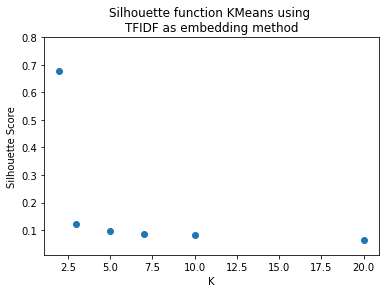

In [176]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2,3,5,7,10,20]
silhouette = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(average_vector)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(average_vector, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tfidf_matrix_2, cluster_labels)

plt.scatter([2,3,5,7,10,20], silhouette)
plt.ylim(ymin= 0.01 ,ymax = 0.8)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette function KMeans using \nTFIDF as embedding method')
plt.savefig('sil_km_tfidf')

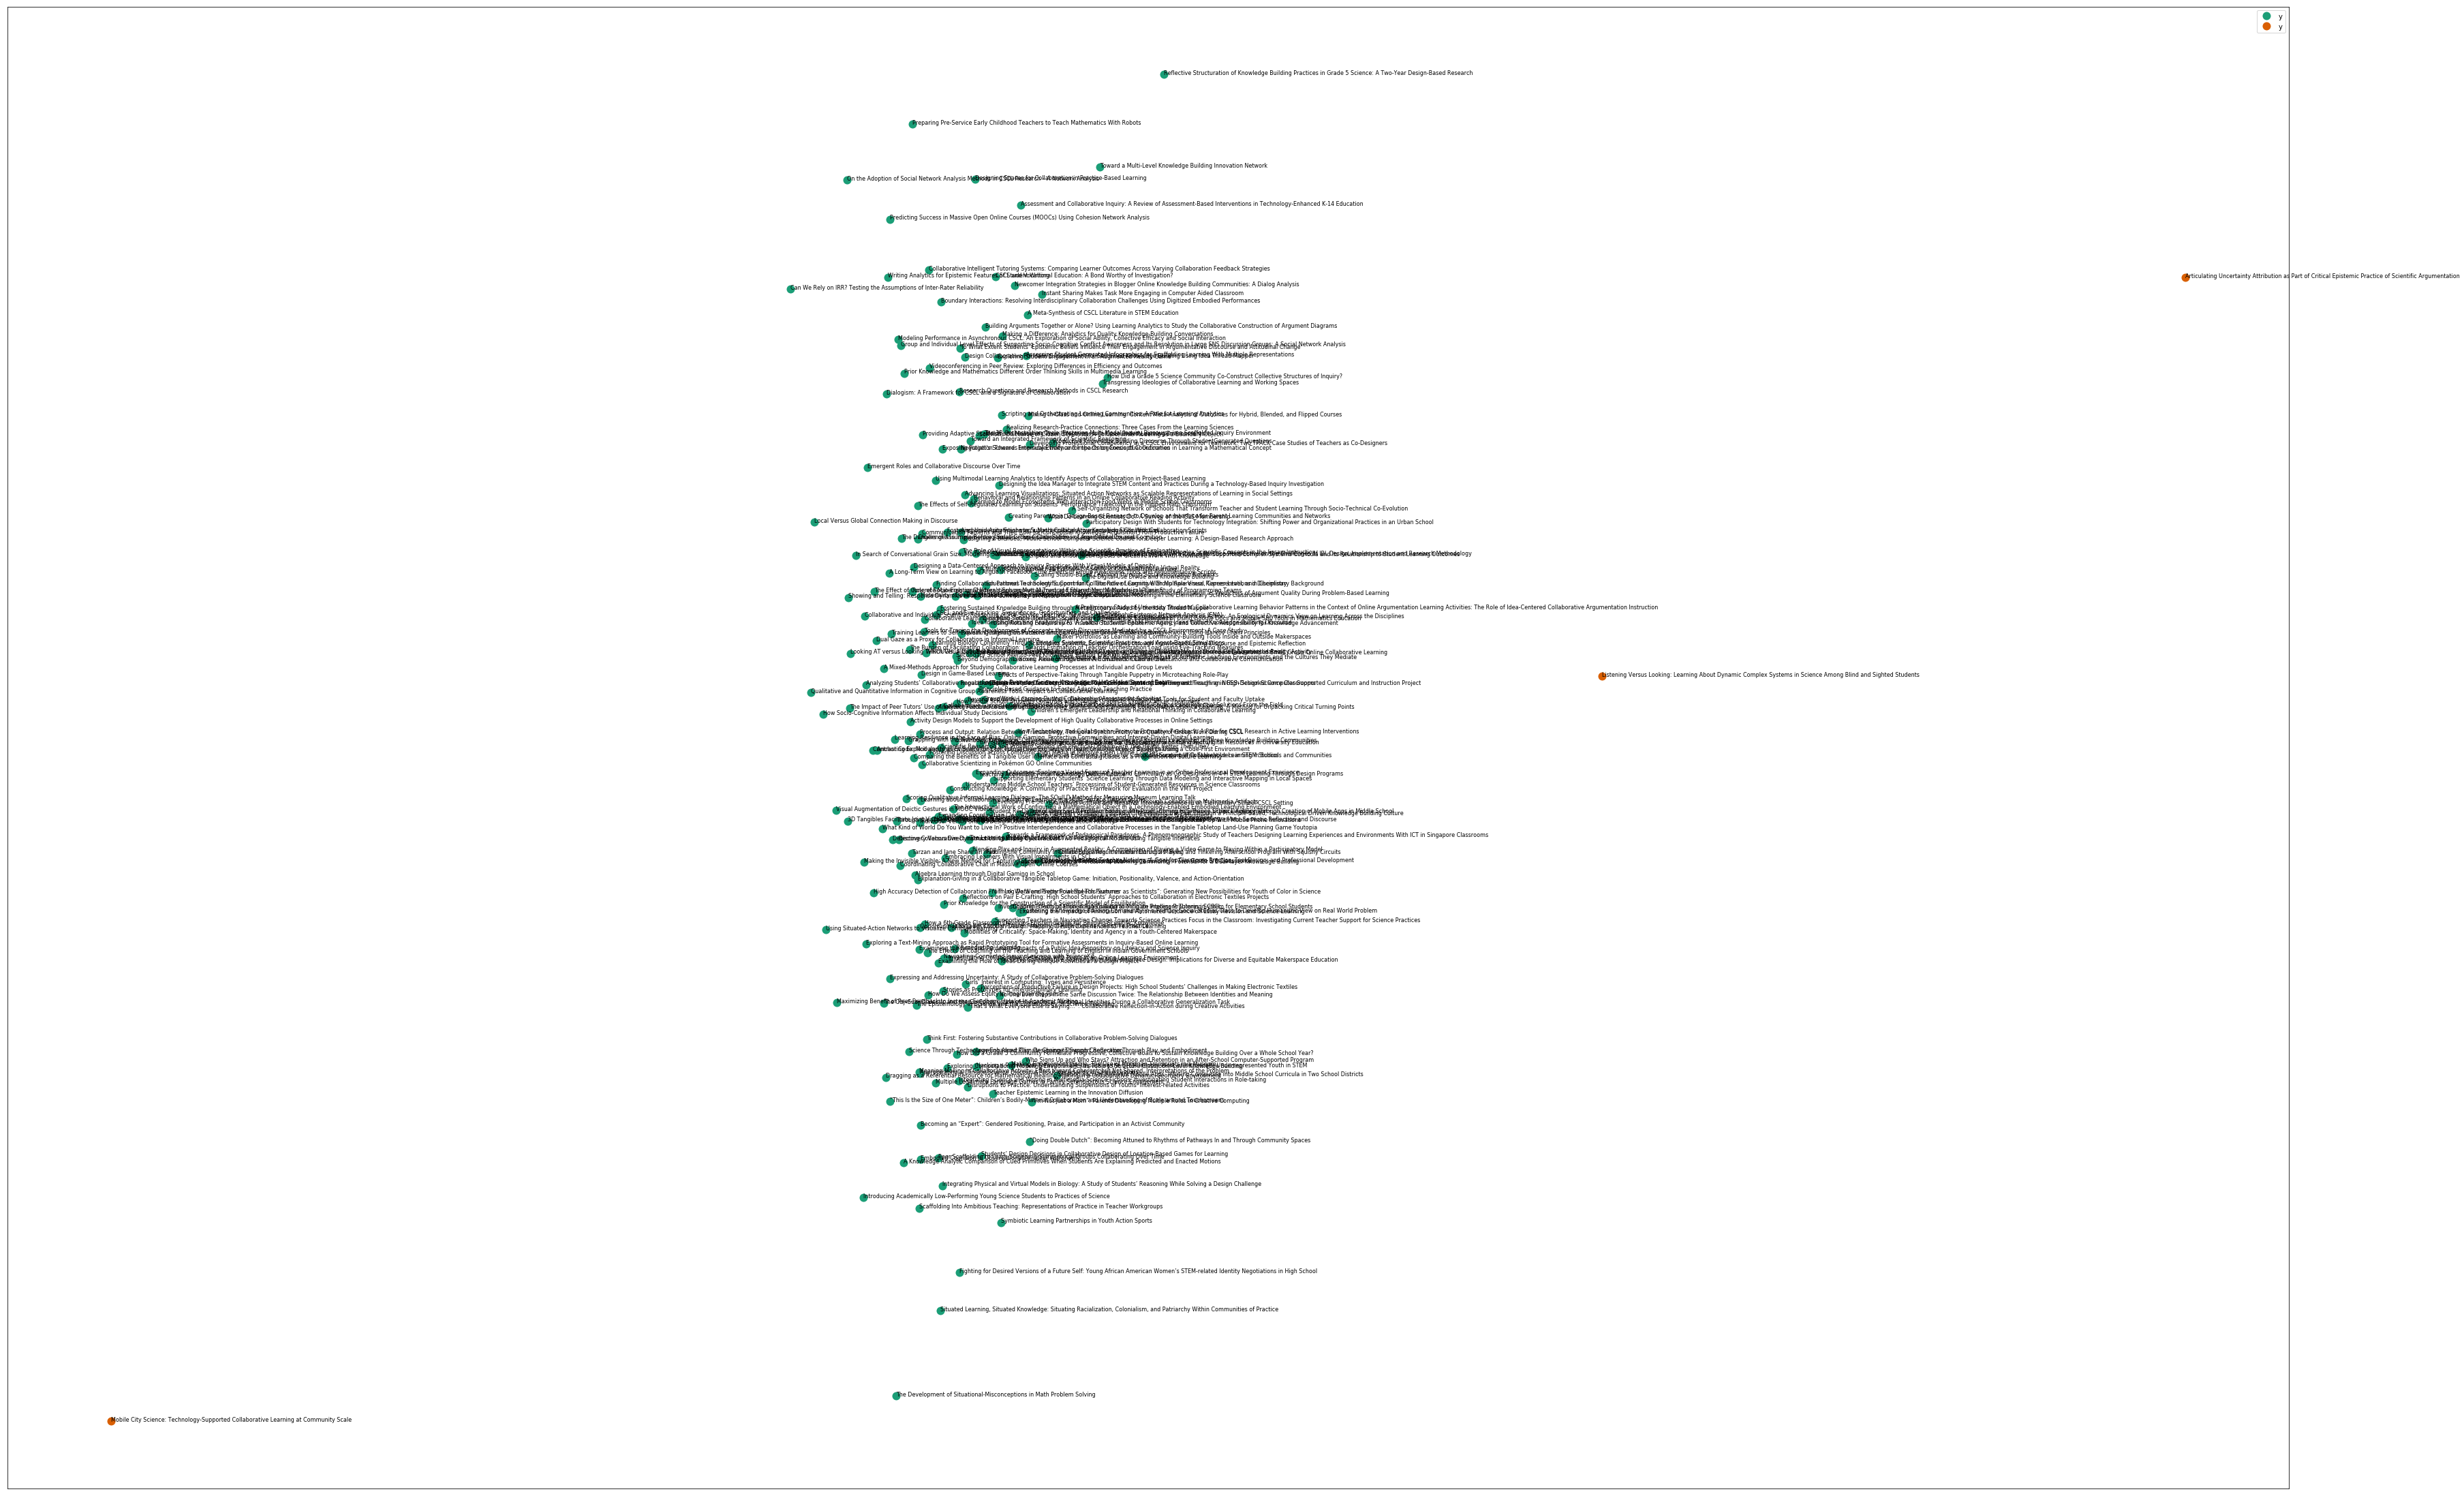

In [164]:
plot_cos_dist_clust(average_vector,clusters_glove)

For n_clusters = 2 The average silhouette_score is : 0.6774748772687488
For n_clusters = 3 The average silhouette_score is : 0.12355310442535919
For n_clusters = 5 The average silhouette_score is : 0.09502070118984504
For n_clusters = 7 The average silhouette_score is : 0.0861777205785319
For n_clusters = 10 The average silhouette_score is : 0.08162334535056132
For n_clusters = 20 The average silhouette_score is : 0.06290288713390402


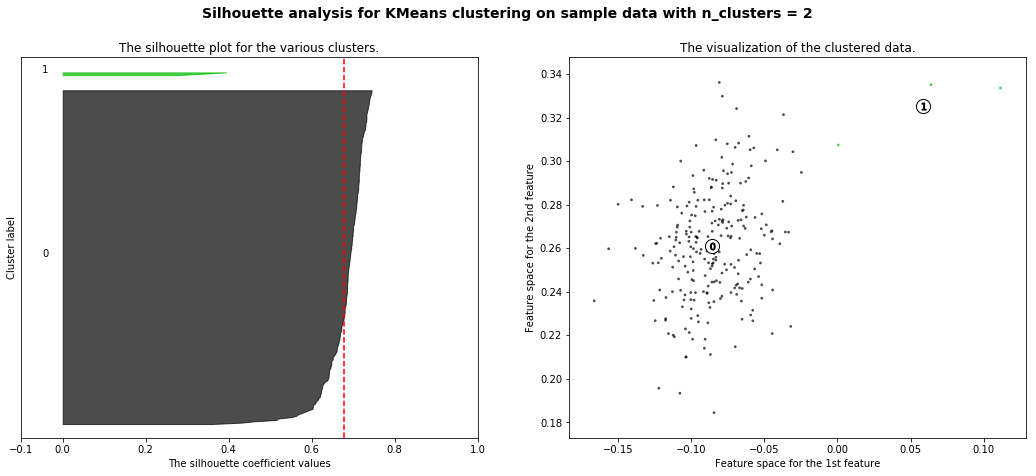

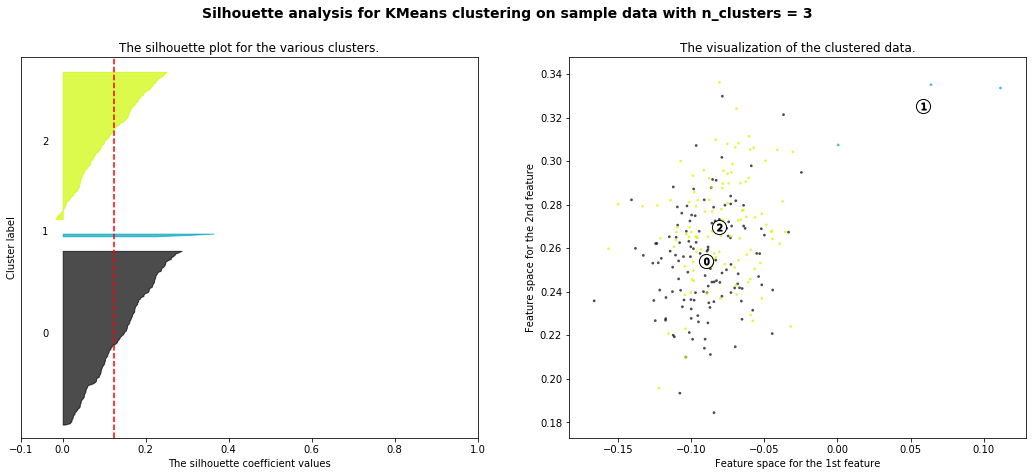

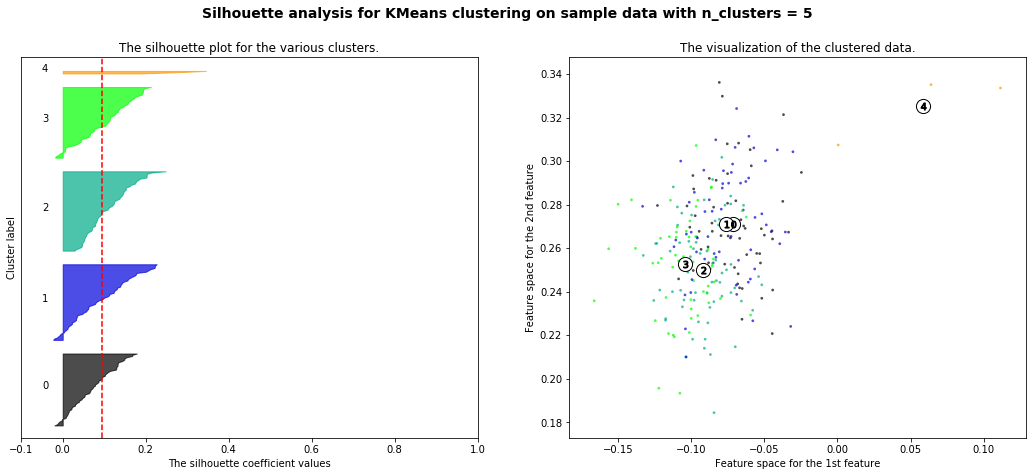

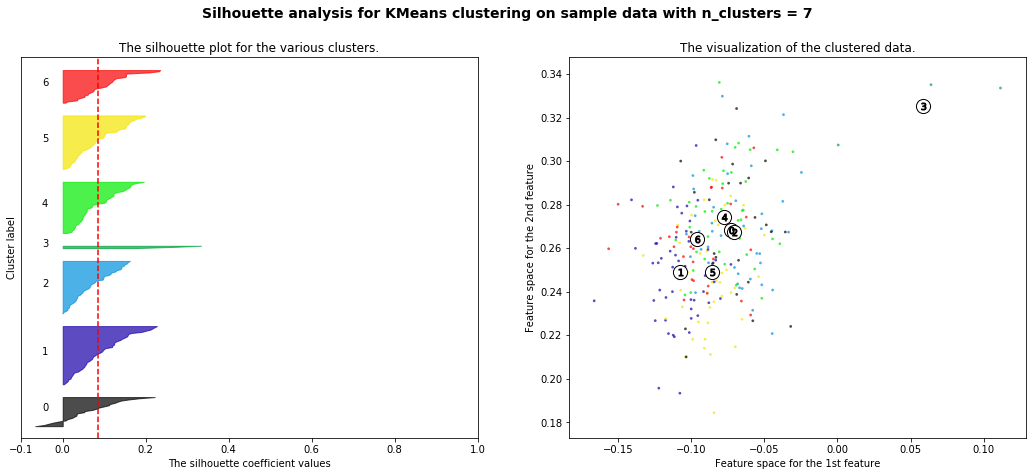

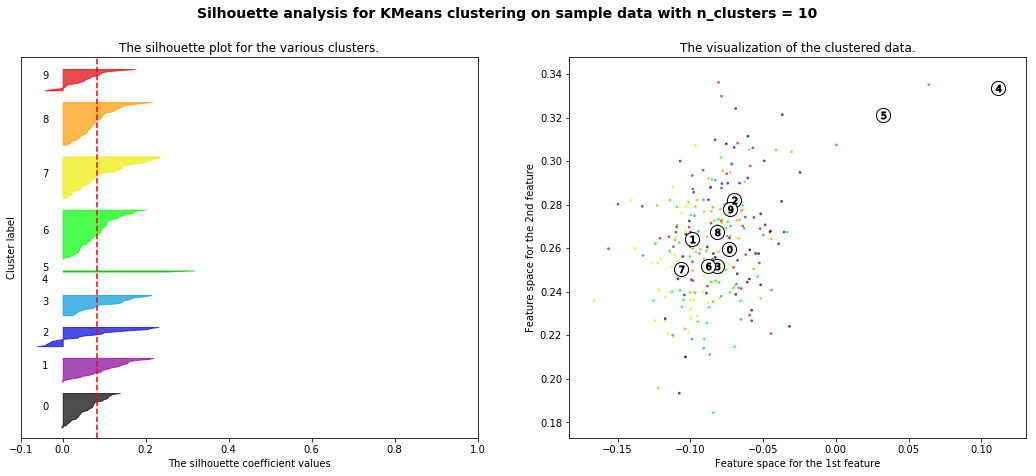

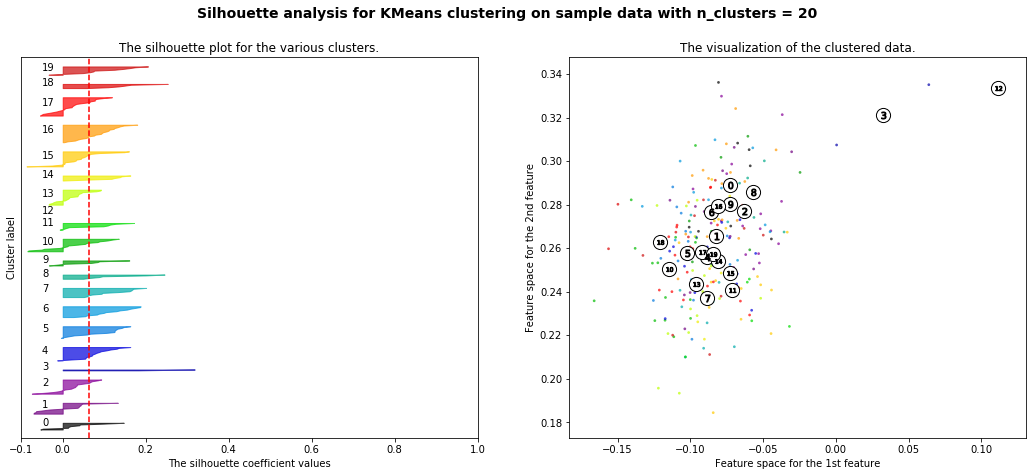

([0.6774748772687488,
  0.12355310442535919,
  0.09502070118984504,
  0.0861777205785319,
  0.08162334535056132,
  0.06290288713390402],
 [2, 3, 5, 7, 10, 20])

In [165]:
see_clusters(average_vector,clusters_glove,range_n_clusters)

### PCA to try to see the clustering on the two most important axis

In [166]:
from sklearn.decomposition import PCA

In [167]:
pca = PCA(.95)
pca.fit((average_vector))
components = pca.transform((average_vector))
approximation = pca.inverse_transform(components)
print('PCA used %s components' %pca.n_components_)

PCA used 38 components


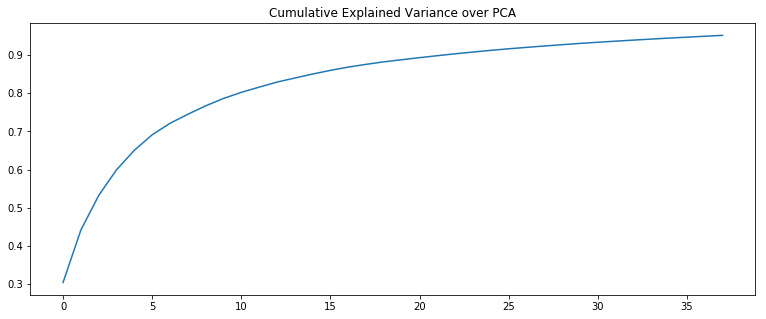

In [168]:
plt.figure(figsize=(13, 5));
plt.title('Cumulative Explained Variance over PCA');
plt.plot(pca.explained_variance_ratio_.cumsum());


In [169]:
pca = PCA(n_components=38)
pca.fit(average_vector)

PCA(copy=True, iterated_power='auto', n_components=38, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [170]:
components = pca.transform((average_vector))

In [171]:
num_clusters = 2
km_glove = KMeans(n_clusters=num_clusters)
%time km_glove.fit(components)
clusters_glove_pca = km_glove.labels_.tolist()

CPU times: user 97.7 ms, sys: 3.34 ms, total: 101 ms
Wall time: 25.7 ms


For n_clusters = 2 The average silhouette_score is : 0.6870764016043205
For n_clusters = 3 The average silhouette_score is : 0.1337939184012465
For n_clusters = 5 The average silhouette_score is : 0.10006977097000598
For n_clusters = 7 The average silhouette_score is : 0.0961302600684868
For n_clusters = 10 The average silhouette_score is : 0.07391203214882373
For n_clusters = 20 The average silhouette_score is : 0.06190697985579479


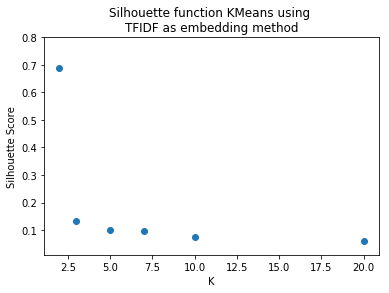

In [172]:

plt.scatter([2,3,5,7,10,20], silhouette)
plt.ylim(ymin= 0.01 ,ymax = 0.8)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette function KMeans using \nTFIDF as embedding method')
plt.savefig('sil_km_tfidf')

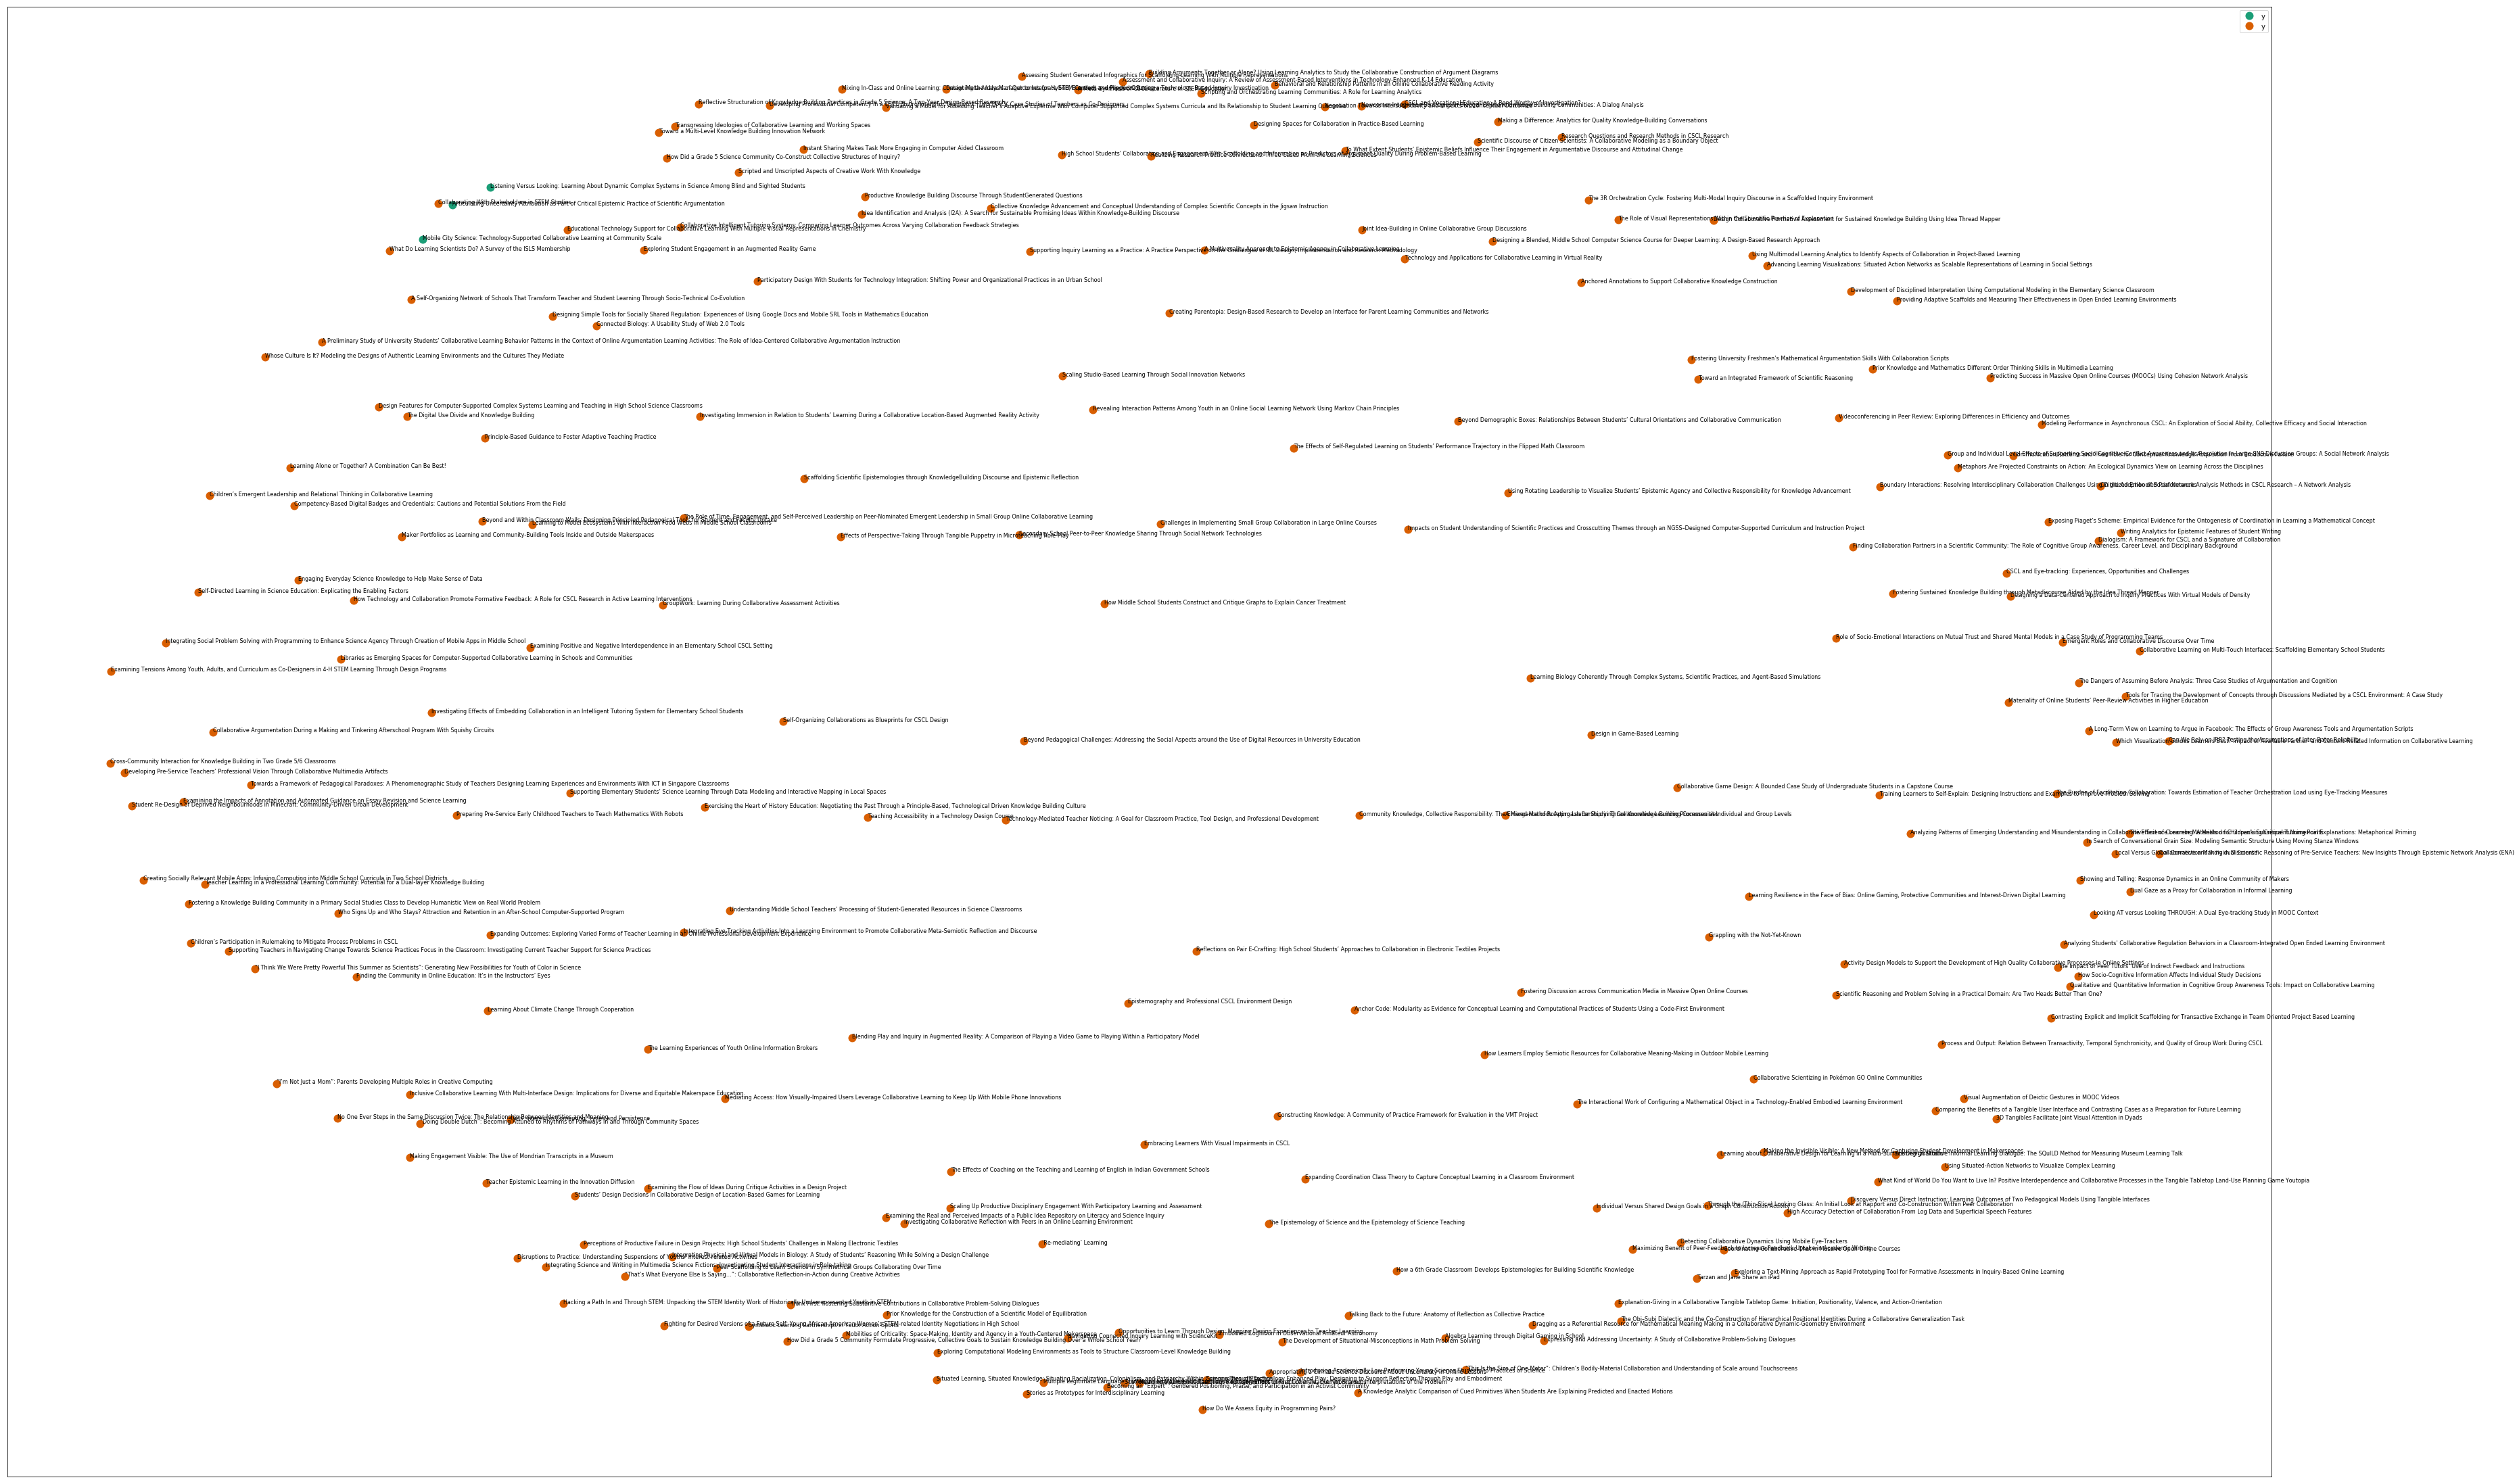

In [173]:
plot_cos_dist_clust(components,clusters_glove_pca)

For n_clusters = 2 The average silhouette_score is : 0.6870764016043205
For n_clusters = 3 The average silhouette_score is : 0.1337939184012465
For n_clusters = 5 The average silhouette_score is : 0.10006977097000598
For n_clusters = 7 The average silhouette_score is : 0.0961302600684868
For n_clusters = 10 The average silhouette_score is : 0.07391203214882373
For n_clusters = 20 The average silhouette_score is : 0.06190697985579479


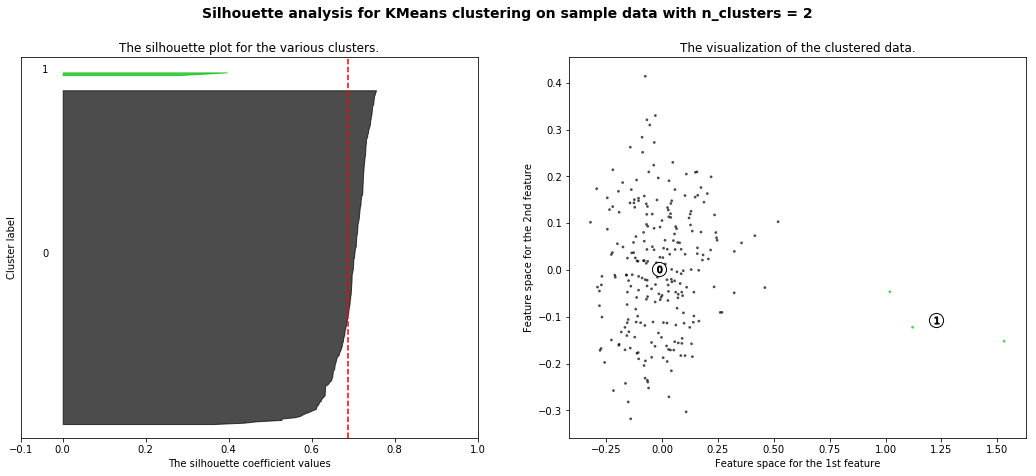

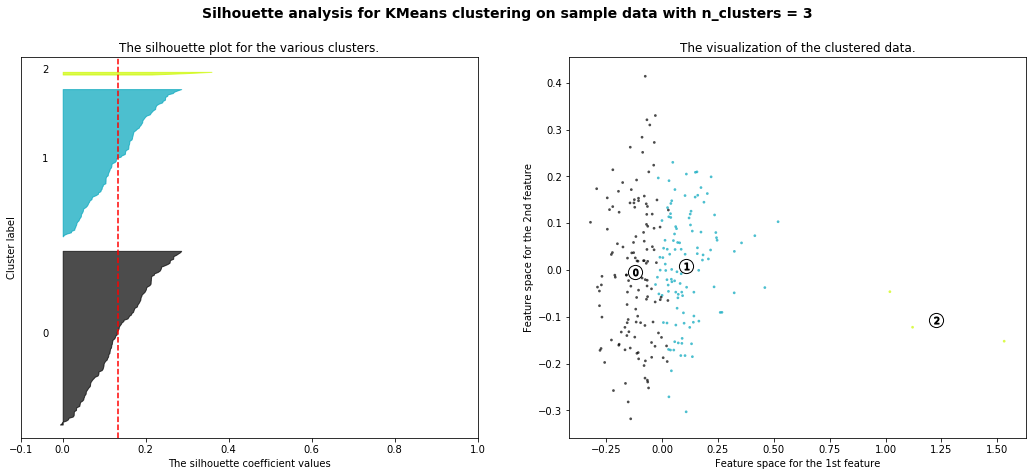

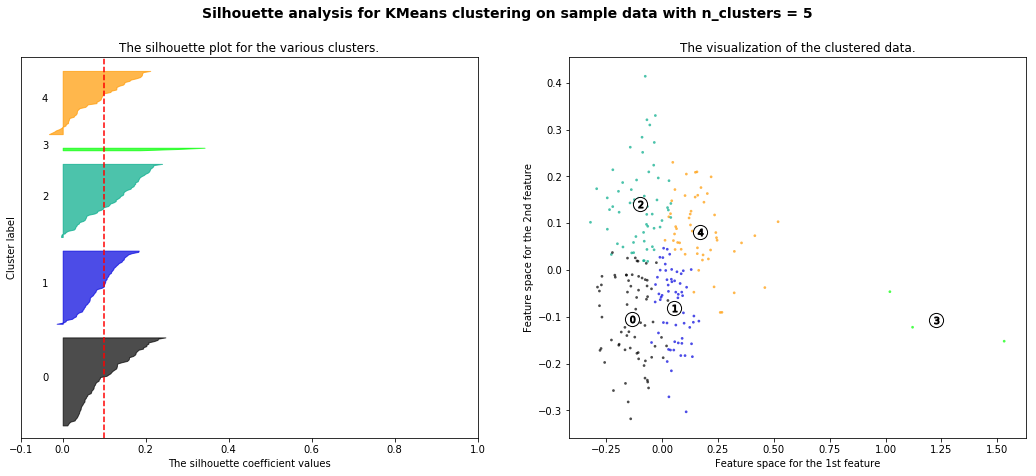

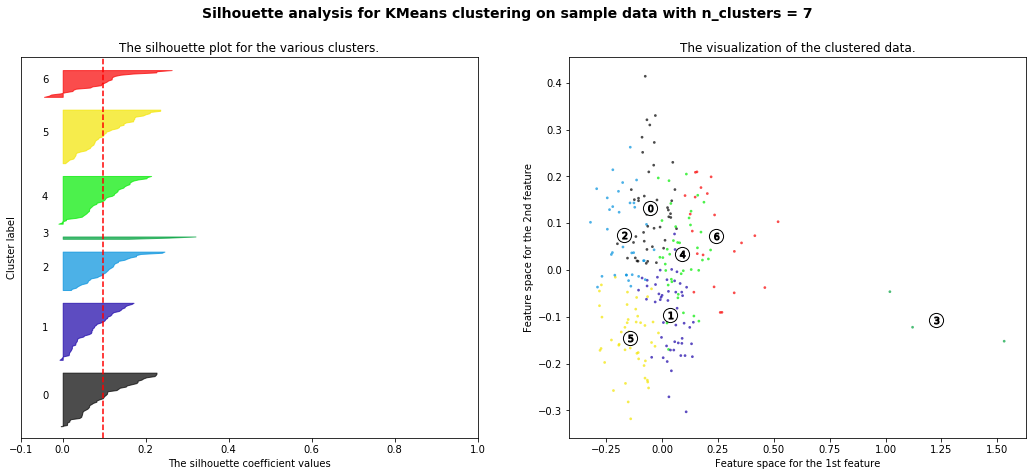

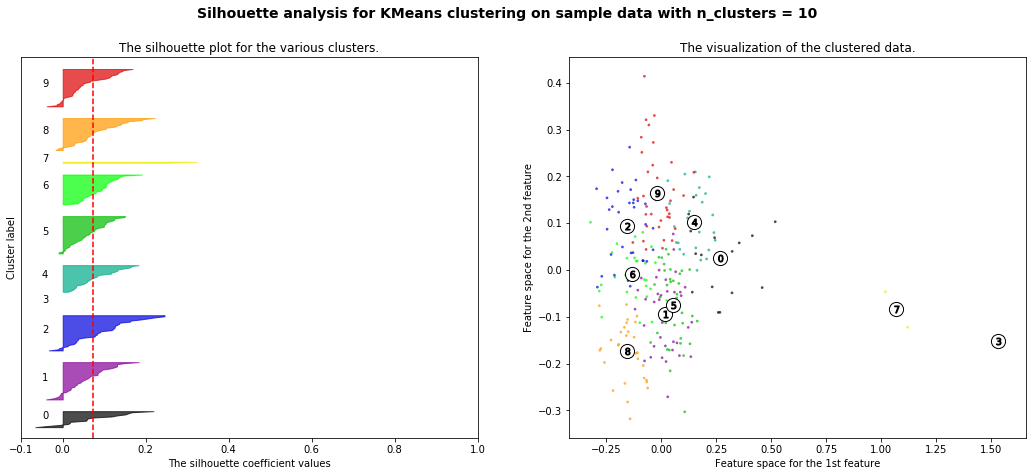

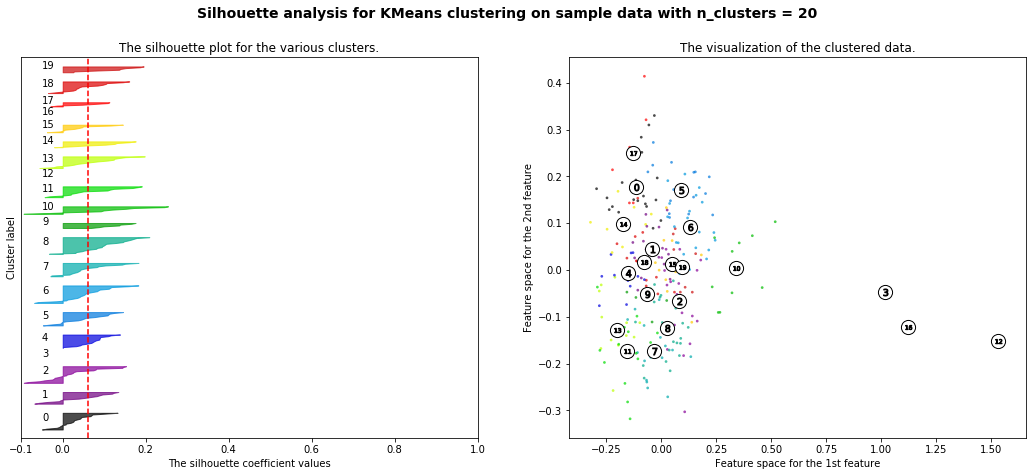

In [175]:
silhouette, range_n_clusters = see_clusters(components,clusters_glove_pca,range_n_clusters) 